In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as pltax
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import math
from scipy.optimize import curve_fit
from scipy import optimize as opt
import os
import astropy as ast
import pandas as pd
import statistics as stat
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
%matplotlib inline

In [2]:
plt.rcdefaults()
font={'family':'Times New Roman',
        'weight':'bold',
        'size':18}
matplotlib.rc('font',**font)
matplotlib.rc('xtick',labelsize=14) 
matplotlib.rc('ytick',labelsize=14)

In [3]:
#block from https://stackoverflow.com/questions/58108964/how-to-open-multiple-files-in-loop-in-python
folderpath=r"C:\Users\Atticus Chong\OneDrive\Documents\Summer_Internship_2021\Photometry_Initial" # make sure to put the 'r' in front
filepaths =[os.path.join(folderpath,name) for name in os.listdir(folderpath)]
files=[]
filenames=[]

for path in filepaths:
    with open(path,'r') as f:
        #name list=filenames
        filename=str(f)
        filename=filename.lstrip("<_io.TextIOWrapper name='C:\\\\Users\\\\Atticus Chong\\\\OneDrive\\\\Documents\\\\Summer_Internship_2021\\\\")
        filename=filename.lstrip("Photometry_Initial")
        filename=filename.lstrip("\\\\")                #strip function was being annoying and sometimes removing letters at the beginning of the filename so I had to split up the strips
        filename=filename.rstrip("' mode='r' encoding='cp1252'>")
        filenames.append(filename)
        #data list=files
        file=np.loadtxt(path,skiprows=4,dtype=str,unpack=True)
        files.append(file)

In [4]:
#block from https://stackoverflow.com/questions/58108964/how-to-open-multiple-files-in-loop-in-python
folderpath=r"C:\Users\Atticus Chong\OneDrive\Documents\Summer_Internship_2021\AAVSO_Photometry_clean" # make sure to put the 'r' in front
filepaths=[os.path.join(folderpath,name) for name in os.listdir(folderpath)]
AAVSOfiles=[]
AAVSOfilenames=[]

for path in filepaths:
    with open(path,'r') as f:
        #name list=filenames
        filename=str(f)
        filename=filename.lstrip("<_io.TextIOWrapper name='C:\\\\Users\\\\Atticus Chong\\\\OneDrive\\\\Documents\\\\Summer_Internship_2021\\\\")
        filename=filename.lstrip("AAVSO_Photometry_clean")
        filename=filename.lstrip("\\\\")                #strip function was being annoying and sometimes removing letters at the beginning of the filename so I had to split up the strips
        filename=filename.rstrip("' mode='r' encoding='cp1252'>")
        AAVSOfilenames.append(filename)
        #data list=files
        file=np.loadtxt(path,dtype=object,delimiter=',',unpack=True)
        AAVSOfiles.append(file)

In [5]:
eruption_dates=pd.read_csv("nova_t0.csv")
eruption_dates_arr=np.array(eruption_dates['t_0'])
#date_diff=eruption_dates_arr - 2450000
names_arr=np.array(eruption_dates['Name'])
filenames_arr=np.array(eruption_dates['FileName'])

In [6]:
#-3 is n/a, -2 is bad data, -1 is unsure, 0 is none, 1 is IR excess, 2 is dust dip
Decent_Dust=pd.read_csv("Decent_Lightcurves_Chart_Presentation.csv")
Decent_Dust_Names=np.array(Decent_Dust["Name"])
Decent_Dust_geq_20=np.array(Decent_Dust["geq_20"])
Decent_Dust_Hard_Mask=np.array(Decent_Dust["Hard_Mask"])
Decent_Dust_Elias_Mask=np.array(Decent_Dust["Elias_Mask"])
Decent_Dust_chunksize=np.array(Decent_Dust["chunksize"])
Decent_Dust_xlim_1=np.array(Decent_Dust["xlim_1"])
Decent_Dust_xlim_2=np.array(Decent_Dust["xlim_2"])
Decent_Dust_decline_start=np.array(Decent_Dust["decline_start"])
Decent_Dust_recover_end=np.array(Decent_Dust["recover_end"])
Decent_Dust_recurrent=np.array(Decent_Dust["Recurrent"])
Decent_Dust_category=np.array(Decent_Dust["category"])
Decent_Dust_official=np.array(Decent_Dust["Official"])
print(np.size(np.where(Decent_Dust_geq_20==1)[0]),"novae have at least 20 measurements each for the V and K bands.")
print(np.size(np.where(Decent_Dust_category==-1)[0])+np.size(np.where(Decent_Dust_category==0)[0])+np.size(np.where(Decent_Dust_category==1)[0])+np.size(np.where(Decent_Dust_category==2)[0]),"novae have usable data.")
print(np.size(np.where(Decent_Dust_category==1)[0])+np.size(np.where(Decent_Dust_category==2)[0]),"novae with decent data have a dust dip.")

79 novae have at least 20 measurements each for the V and K bands.
41 novae have usable data.
18 novae with decent data have a dust dip.


In [7]:
Elias_t2_df=pd.read_csv('Elias_t2.csv')
t2arr_floatcheck=np.transpose(np.array(Elias_t2_df.iloc[:,0:3]))

Elias_t2_arr=[]
for i in t2arr_floatcheck[2]:
    try:
        float(i)
    except ValueError:
        Elias_t2_arr.append(np.NaN)
    else:
        Elias_t2_arr.append(float(i))
Elias_t2_arr=np.array([t2arr_floatcheck[1],Elias_t2_arr])
t2_arr=np.array(Elias_t2_arr[1],dtype=float)

In [8]:
def name_translator(in_name):
    pairsarr=np.transpose(np.array(Decent_Dust.iloc[:,[0,12]]))
    if len(np.where(pairsarr[0]==in_name)[0])>0:
        return pairsarr[1,np.where(pairsarr[0]==in_name)[0][0]]
    elif len(np.where(pairsarr[1]==in_name)[0])>0:
        return pairsarr[0,np.where(pairsarr[1]==in_name)[0][0]]
    else:
        return in_name+' no match'

In [9]:
name_translator('V357 Mus')

'N Mus 2018'

In [10]:
t2_dustduration_na=pd.read_csv('Observations.csv')
t2_dustduration=t2_dustduration_na.dropna()

In [11]:
t2_dustduration_names=np.array(t2_dustduration.iloc[:,0])
t2_dustduration_dur=np.array(t2_dustduration.iloc[:,2])-np.array(t2_dustduration.iloc[:,1])

In [12]:
nacount=0
baddatacount=0
unsurecount=0
nonecount=0
irexcesscount=0
dustdipcount=0
for ii in Decent_Dust_category:
    if ii==-3:
        nacount+=1
    if ii==-2:
        baddatacount+=1
    if ii==-1:
        unsurecount+=1
    if ii==0:
        nonecount+=1
    if ii==1:
        irexcesscount+=1
    if ii==2:
        dustdipcount+=1
print(nacount,baddatacount,unsurecount,nonecount,irexcesscount,dustdipcount)

15 37 7 16 3 15


In [13]:
#dataframe dump
features=pd.DataFrame(Decent_Dust_geq_20,index=Decent_Dust_Names,columns=['geq_20'])
header_list=['geq_20','broken_m1','broken_m2','cont_m1','cont_m2','big_drop','big_rise','mag_range','biggest_change','color_change_from_vmax','day_change_from_vmax',
             'recurrent','category','vband_change_over_interval','jband_change_over_interval','Vpeak','t2']
features=features.reindex(columns=header_list)
features['recurrent']=Decent_Dust_recurrent
features['category']=Decent_Dust_category
features['t2']=t2_arr
features['biggest_change']=0

In [14]:
Decent_Dust_official_underscored_l=[]
for obj in Decent_Dust_official:
    Decent_Dust_official_underscored_l.append(obj.replace(' ','_')+'.txt')
Decent_Dust_official_underscored=np.array(Decent_Dust_official_underscored_l,dtype=object)
AAVSOfilenames_indexlist=[]
for i in range(len(AAVSOfilenames)):
    AAVSOfilenames_indexlist.append(np.where(Decent_Dust_official_underscored==AAVSOfilenames[i])[0][0])
AAVSOfilenames_indexarr=np.array(AAVSOfilenames_indexlist)

In [15]:
def avgchunks(xlist,ylist,chunksize):
    x=list(xlist)
    y=list(ylist)
    avgx=[]
    avgy=[]
    x_temp_array=np.array(x)
    y_temp_array=np.array(y)

    now_ind=0
    while now_ind<np.size(x_temp_array):
        sameday_ind_list=np.where(x_temp_array<=x_temp_array[now_ind]+chunksize)[0]
        sameday_too_early=np.where(sameday_ind_list<now_ind)[0]
        too_early_no=np.size(sameday_too_early)
        for ee in range(too_early_no):
            sameday_ind_list=np.delete(sameday_ind_list,0)
        temp_datelist=[]
        temp_maglist=[]
        for ii in sameday_ind_list:
            temp_datelist.append(x[ii])
            temp_maglist.append(y[ii])
        avgx.append(stat.mean(temp_datelist))
        avgy.append(stat.mean(temp_maglist))
        now_ind+=int(len(sameday_ind_list))
    return avgx,avgy
def derivchart(xlist,ylist):
    x=xlist
    y=ylist
    dydt_list=[]
    x_list=[]
    for ii in range(1,np.size(x)):
        dy_dt=(y[ii]-y[ii-1])/(x[ii]-x[ii-1])
        dydt_list.append(dy_dt)
        x_list.append(x[ii])
    return x_list,dydt_list
def Color(xlist1,xlist2,ylist1,ylist2,else_xlist=[],else_ylist=[]):
    if len(xlist1)>1 and len(xlist2)>1:
        #Color
        first1=int(xlist1[0])
        last1=int(xlist1[-1])
        first2=int(xlist2[0])
        last2=int(xlist2[-1])
        if first1<first2:  #the first day to check will be the later of the two,as only when both start can there be overlap
            first=first2
        else:
            first=first1
        if last1>last2:    #the last day will be the first of the two,as the con only overlap when both are being measured
            last=last2
        else:
            last=last1      
        daylist1=[]                #list of the days for which there are measurements of the K band
        xmeanlist1=[]           #list of the mean dates in the K band bins
        ymeanlist1=[]            #list of the mean mags in the K band bins
        x_arr1=np.array(xlist1)   #K band date array to use numpy with
        if(last>0):
            rangemod=1
        elif(last<0):
            rangemod=-1
        else:
            rangemod='0'
        for curr_val in range(first,last+rangemod):  #for dates when both bands might be being measured
            ind_right_side1=np.where(curr_val<=x_arr1)[0] #the right side indices include everything on that day and forward
            ind_left_side1=np.where(curr_val+1>x_arr1)[0] #the left side indices include everything before the next day
            ind_left_end1=ind_right_side1[0] #the left end is the leftmost value on the right side array
            ind_right_end1=ind_left_side1[-1]#[np.size(ind_left_side1)-1] #the right end is the rightmost value on the left side array
            if ind_left_end1<=ind_right_end1: #if the left end coincides with or is to the left of the right end
                ind_full1=np.arange(ind_left_end1,ind_right_end1+1) #list of indices in Kdate that fall within the 1-day range ahead of curr_date
                tempxsumlist1=[] #temporary date list
                tempysumlist1=[] #temporary mag list 
                for ii in ind_full1: #for indices in the list of dates during that day
                    tempxsumlist1.append(xlist1[ii])
                    tempysumlist1.append(ylist1[ii])
                xmean1=stat.mean(tempxsumlist1)
                ymean1=stat.mean(tempysumlist1)
                daylist1.append(curr_val)
                xmeanlist1.append(xmean1)
                ymeanlist1.append(ymean1)
        daylist2=[]
        xmeanlist2=[]
        ymeanlist2=[]
        x_arr2=np.array(xlist2)
        for curr_val in range(first,last+rangemod):
            ind_right_side2=np.where(curr_val<=x_arr2)[0]
            ind_left_side2=np.where(curr_val+1>x_arr2)[0]
            ind_left_end2=ind_right_side2[0]
            ind_right_end2=ind_left_side2[-1]#[np.size(ind_left_side2)-1]
            if ind_left_end2<=ind_right_end2:
                ind_full2=np.arange(ind_left_end2,ind_right_end2+1) #list of indices in Vdate that fall within the 1-day range ahead of curr_date
                tempxsumlist2=[]
                tempysumlist2=[]
                for ii in ind_full2:
                    tempxsumlist2.append(xlist2[ii])
                    tempysumlist2.append(ylist2[ii])
                xmean2=stat.mean(tempxsumlist2)
                ymean2=stat.mean(tempysumlist2)
                daylist2.append(curr_val)
                xmeanlist2.append(xmean2)
                ymeanlist2.append(ymean2)
        #find where points exist for both K and V
        daylist=[]
        daylist_arr2=np.array(daylist2)
        for day1 in daylist1:
            overlap_bool_arr=np.where(daylist_arr2==day1)[0]
            if np.size(overlap_bool_arr)==1:
                daylist.append(day1)
        #combine into final color array
        y_list=[]
        daylist_arr1=np.array(daylist1)
        for day in daylist: #for the overlap days (when there is a datapoint during that day for dust dip K and V bands)
            y_list.append(ymeanlist2[int(np.where(daylist_arr2==day)[0])]-ymeanlist1[int(np.where(daylist_arr1==day)[0])])
    else:
        daylist=else_xlist
        y_list=else_ylist
    return daylist,y_list
def shortenlist(list1,list2,start,end):
    short_list1=[]
    short_list2=[]
    for i,aa in enumerate(list1):
        if aa>=start and aa<=end:
            short_list1.append(aa)
            short_list2.append(list2[i])
    return short_list1,short_list2
def downtoten(no):
    lowno=no/10
    lownoint=int(lowno)
    noint=lownoint*10
    return noint
def linearfunc(x,m,b):
    return m*x+b
def findoptsplit(datelist,maglist,left_end,right_end):
    reslist=[]
    tlist=[]
    xlist=[]
    x=downtoten(left_end) + 10
    while x<right_end:
        xlist.append(x)
        x += 5
    for time in xlist:
        datelist1,maglist1=shortenlist(datelist,maglist,left_end,time)
        datelist2,maglist2=shortenlist(datelist,maglist,time,right_end)
        if (time-left_end)<20*(right_end-time) and 20*(time-left_end)>(right_end-time):
            if len(datelist1)>3 and len(datelist2)>3:
                p1,residuals1,rank1,singular_values1,rcond1=np.polyfit(datelist1,maglist1,1,full=True)
                p2,residuals2,rank2,singular_values2,rcond2=np.polyfit(datelist2,maglist2,1,full=True)
                res=(abs(residuals1[0])*abs(residuals2[0])/abs(abs(residuals1[0])-abs(residuals2[0])))
                reslist.append(res)
                tlist.append(time)
    if len(reslist)>=1:
        reslist_arr=np.asarray(reslist)
        opt_split=tlist[np.argmax(reslist_arr)]
        opt_res=reslist[np.argmax(reslist_arr)]
    else:
        opt_split=0
        opt_res=0
    return opt_split,opt_res
def piecewise_linear(x,x0,y0,k1,k2):
    return np.piecewise(x,[x<x0],[lambda x:k1*x + y0-k1*x0,lambda x:k2*x + y0-k2*x0])
def piecewise_fitter(xlist,ylist,func,p0):
    x_arr=np.asarray(xlist)
    y_arr=np.asarray(ylist)
    a=0
    split=p0[0]
    p0_short=p0[1:]
    while a==0:
        popt,pcov=curve_fit(func,xlist,ylist,p0=[split]+p0_short)
        s=0
        popt_short=popt[1:]
        for i,x in enumerate(xlist):
            s += (ylist[i] - func(x,split,*popt_short))**2
        rightside=np.where(x_arr>=split)[0]
        leftside=np.where(x_arr<=split)[0]
        if rightside[0]>leftside[-1]:
            right=np.mean(np.array([xlist[rightside[0]],xlist[rightside[1]]]))
            left=np.mean(np.array([xlist[leftside[-2]],xlist[leftside[-1]]]))
        elif rightside[0]==leftside[-1]:
            right=xlist[rightside[0]+1]
            left=xlist[rightside[0]-1]
        else:
            right='error'
            left='error'
        #right side
        rpopt,rpcov=curve_fit(func,xlist,ylist,p0=[right]+p0_short)
        rsplit=rpopt[0]
        rs=0
        for i,x in enumerate(xlist):
            rs += (ylist[i] - func(x,*rpopt))**2
        #left side
        lpopt,lpcov=curve_fit(func,xlist,ylist,p0=[left]+p0_short)
        lsplit=lpopt[0]
        ls=0
        for i,x in enumerate(xlist):
            ls += (ylist[i] - func(x,*lpopt))**2
        #
        optmax=int(np.argmin(np.asarray([s,rs,ls])))
        optpos=[split,rsplit,lsplit][optmax]
        if optpos<xlist[1] or optpos>xlist[-2]:
            a=1
#            print('Iteration went out of bounds. Returning most recent iteration.')
        elif optmax==0:
            a=1
        elif optmax!=0:
            split=optpos
    return split
def threepiecewise_linear(x,x0,x1,b,k1,k2,k3):
    condlist=[x<x0,(x>=x0) & (x<x1),x>=x1]
    funclist=[lambda x: k1*x + b,lambda x: k1*x + b + k2*(x-x0),lambda x: k1*x + b + k2*(x-x0) + k3*(x - x1)]
    return np.piecewise(x,condlist,funclist)
def threepiecewise_fitter(bigxlist,bigylist,func=threepiecewise_linear,xmax=250):
    fitted=False
    bigxstart=bigxlist[0]
    xlist,ylist=shortenlist(bigxlist,bigylist,bigxstart,xmax)
    if len(xlist)<6:
        return "Insufficient data."
    xstart=xlist[0]
    xend=xlist[-1]
    x0splitstart=xlist[1]
    x0splitend=xlist[-3]
    x1splitstart=xlist[2]
    x1splitend=xlist[-2]
    boundsequence=((x0splitstart,x1splitstart,-np.inf,-np.inf,-np.inf,-np.inf),(x0splitend,x1splitend,np.inf,np.inf,np.inf,np.inf))
    guess=[xstart+((xend-xstart)*(1/3)),xstart+((xend-xstart)*(2/3)),0,0,0,0]
    while fitted==False:
        Sameslot=False
        Adjacent=False
        differencestopper=0
        vopt,vcov=curve_fit(func,xlist,ylist,p0=guess,bounds=boundsequence)
        curr_difference=0
        x0_to_left_difference=0
        x0_to_right_difference=0
        x1_to_left_difference=0
        x1_to_right_difference=0
        x0_curr,x1_curr,b_curr,k1_curr,k2_curr,k3_curr=vopt
        x0_leftof_index=int(max(np.where(xlist<=x0_curr)[0]))
        x1_leftof_index=int(max(np.where(xlist<=x1_curr)[0]))
        if x0_leftof_index==x1_leftof_index:
            Sameslot=True
        if x0_leftof_index+1==x1_leftof_index:
            Adjacent=True
        if x0_leftof_index!=0:
            differencestopper+=1
            #moving x0 left
            x0_to_left_guess=[stat.mean([xlist[x0_leftof_index-1],xlist[x0_leftof_index]]),stat.mean([xlist[x1_leftof_index],xlist[x1_leftof_index+1]]),b_curr,k1_curr,k2_curr,k3_curr]
            x0leftopt,x0leftcov=curve_fit(func,xlist,ylist,p0=x0_to_left_guess,bounds=boundsequence)
        if Sameslot==False:
            differencestopper+=2
            #moving x0 right
            x0_to_right_guess=[stat.mean([xlist[x0_leftof_index+1],xlist[x0_leftof_index+2]]),stat.mean([xlist[x1_leftof_index],xlist[x1_leftof_index+1]]),b_curr,k1_curr,k2_curr,k3_curr]
            x0rightopt,x0rightcov=curve_fit(func,xlist,ylist,p0=x0_to_right_guess,bounds=boundsequence)
            #moving x1 left
            x1_to_left_guess=[stat.mean([xlist[x0_leftof_index],xlist[x0_leftof_index+1]]),stat.mean([xlist[x1_leftof_index-1],xlist[x1_leftof_index]]),b_curr,k1_curr,k2_curr,k3_curr]
            x1leftopt,x0leftcov=curve_fit(func,xlist,ylist,p0=x1_to_left_guess,bounds=boundsequence)
        if x1_leftof_index!=len(xlist)-2:
            differencestopper+=4
            #moving x1 right
            x1_to_right_guess=[stat.mean([xlist[x0_leftof_index],xlist[x0_leftof_index+1]]),stat.mean([xlist[x1_leftof_index+1],xlist[x1_leftof_index+2]]),b_curr,k1_curr,k2_curr,k3_curr]
            x1rightopt,x0rightcov=curve_fit(func,xlist,ylist,p0=x1_to_right_guess,bounds=boundsequence)
        for i,x in enumerate(xlist):
            curr_difference+=np.abs(ylist[i]-func(x,*vopt))
        if differencestopper in [1,3,5,7]:
            for i,x in enumerate(xlist):
                x0_to_left_difference+=np.abs(ylist[i]-func(x,*x0leftopt))
        if differencestopper in [2,3,6,7]:
            for i,x in enumerate(xlist):
                x0_to_right_difference+=np.abs(ylist[i]-func(x,*x0rightopt))
                x1_to_left_difference+=np.abs(ylist[i]-func(x,*x1leftopt))
        if differencestopper in [4,5,6,7]:
            for i,x in enumerate(xlist):
                x1_to_right_difference+=np.abs(ylist[i]-func(x,*x1rightopt))
        fitlist=[curr_difference,x0_to_left_difference,x0_to_right_difference,x1_to_left_difference,x1_to_right_difference]
        bestfitind=np.argmax(np.asarray(fitlist))
        if bestfitind==0:
            fitted=True
        else:
            optlist=['spacer',x0leftopt,x0rightopt,x1leftopt,x1rightopt]
            guess=optlist[bestfitind]
    return vopt,vcov
def finddrop(xlist,ylist,distance=50,radius=10):
    droplist=[]
    xpointlist,ypointlist=[],[]
    for i,x in enumerate(xlist):
        short_x,short_y=shortenlist(xlist,ylist,x+distance-radius,x+distance+radius)
        if len(short_y)>=1:
            droplist.append(ylist[i]-max(short_y))
            xpointlist.append([x,short_x[np.argmax(np.asarray(short_y))]])
            ypointlist.append([ylist[i],short_y[np.argmax(np.asarray(short_y))]])
        else:
            pass
    if len(droplist)>=1:
        plotpoints1,plotpoints2=xpointlist[np.argmin(np.asarray(droplist))],ypointlist[np.argmin(np.asarray(droplist))]
    if len(droplist)>=1:
        return min(droplist),plotpoints1,plotpoints2
    else:
        return "No compatible points. (drop)"
def findrise(xlist,ylist,distance=50,radius=10):
    riselist=[]
    xpointlist,ypointlist=[],[]
    for i,x in enumerate(xlist):
        short_x,short_y=shortenlist(xlist,ylist,x+distance-radius,x+distance+radius)
        if len(short_y)>=1:
            riselist.append(ylist[i]-min(short_y))
            xpointlist.append([x,short_x[np.argmin(np.asarray(short_y))]])
            ypointlist.append([ylist[i],short_y[np.argmin(np.asarray(short_y))]])
        else:
            pass
    if len(riselist)>=1:
        plotpoints1,plotpoints2=xpointlist[np.argmax(np.asarray(riselist))],ypointlist[np.argmax(np.asarray(riselist))]
    if len(riselist)>=1:
        return max(riselist),plotpoints1,plotpoints2
    else:
        return "No compatible points. (rise)"
def findchange(xlist,ylist,distance=250,radius=250):
    changelist=[]
    xpointlist,ypointlist=[],[]
    for i,x in enumerate(xlist):
        short_x,short_y=shortenlist(xlist,ylist,x+distance-radius,x+distance+radius)
        if len(short_y)>=1:
            changelist.append((-1*(np.asarray(short_y)-ylist[i]))[(np.argmax(abs(np.asarray(short_y)-ylist[i])))])
            xpointlist.append([x,short_x[np.argmax(abs(np.asarray(short_y)-ylist[i]))]])
            ypointlist.append([ylist[i],short_y[np.argmax(abs(np.asarray(short_y)-ylist[i]))]])
        else:
            pass
    if len(changelist)>=1:
        plotpoints1,plotpoints2=xpointlist[np.argmax(abs(np.asarray(changelist)))],ypointlist[np.argmax(abs(np.asarray(changelist)))]
    if len(changelist)>=1:
        return changelist[np.argmax(abs(np.asarray(changelist)))],plotpoints1,plotpoints2
    else:
        return "No compatible points. (change)"
def near_int_group(xlist,sep): #returns intervals where the points are less than "carwidth" apart
    xsep=[] #list of the distances between x values
    for i in range(len(xlist)-1):
        xsep.append(xlist[i+1]-xlist[i])
    inc_start_ind=np.where(np.array(xsep)<sep)[0] #Indices where the x separation is less than the width of the boxcar. Intervals from these indices to the next point in the array will be included. Change this to \leq to make inclusive.
    inc_int=[]
    for i in inc_start_ind:
        inc_int.append([xlist[i],xlist[i+1]])  #creating a list of [x1,x2] intervals to be skipped
    i=0
    a=0
    while a==0:
        if i > int(len(inc_int))-2:
            a=1
            break
        while inc_int[i][1]==inc_int[i+1][0]:
            inc_int[i][1]=inc_int.pop(i+1)[1] #collapsing [x1,x2],[x2,x3] down to [x1,x3] so that the program has less checks to make
            if i==int(len(inc_int))-1:
                break
        i+=1
    return inc_int
def smooth_boxcar(xlist,ylist,width,dx=0.1): #boxcar smoother
    r=0.5*width
    x_arr=np.arange(xlist[0],xlist[-1],dx)
    y_arr=x_arr*0
    for i,x in enumerate(x_arr):
        xcar,ycar=shortenlist(xlist,ylist,x-r,x+r)
        y_arr[i]=np.mean(ycar)
    return x_arr,y_arr
def gaussian_func(x,a=1,b=0,c=1):           #gaussian funciton for use in FWHM weighted smoother
    e=np.exp(1)
    return a*(e**(-((x-b)**2)/(2*c**2)))
def smooth_fwhm(xlist,ylist,width,dx=0.1,FWHM=0):    #FWHM weighted smoother
    if FWHM==0:
        FWHM=width
    a=1
    b=0
    e=np.exp
    r=0.5*width
    x_arr=np.arange(xlist[0],xlist[-1],dx)
    y_arr=x_arr*0
    c=FWHM/math.sqrt(8*np.log(2))
    for i,x in enumerate(x_arr):
        xcar,ycar=shortenlist(xlist,ylist,x-r,x+r)
        xgaus=np.array(xcar)-x
        W=gaussian_func(xgaus,c=c)-gaussian_func(r,c=c)
#        print(xgaus,W,np.sum(W),x)
        W=W/np.sum(W)
        y_arr[i]=np.dot(ycar,W)
    return x_arr,y_arr
def broken_smooth(func,xlist,ylist,carwidth,args=[0.1]):     #implementation for smoothing, breaking curve where there aren't points present
    int_list=near_int_group(xlist,carwidth)                  #function, list of x values, list of y values, width of influence on curve, frequency of points, (FWHM of weight function)
    smooth_x=np.array([])
    smooth_y=np.array([])
    for i_i in int_list:
        xtrack,ytrack=shortenlist(xlist,ylist,*i_i)
        shortsmooth_x,shortsmooth_y=func(xtrack,ytrack,carwidth,*args)
        smooth_x=np.append(smooth_x,shortsmooth_x)
        smooth_y=np.append(smooth_y,shortsmooth_y)
    return smooth_x,smooth_y

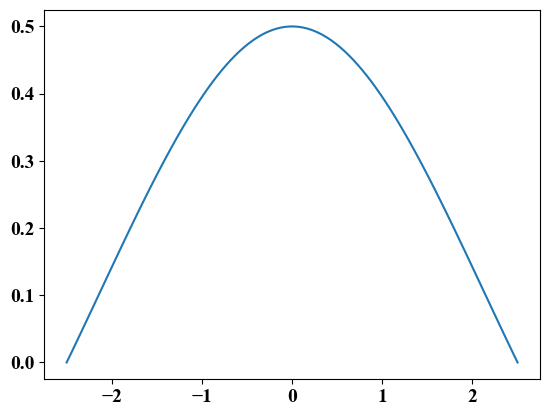

In [16]:
aaa=np.linspace(-2.5,2.5,100)
bbb=gaussian_func(aaa,c=5/math.sqrt(8*np.log(2)))-gaussian_func(2.5,c=5/math.sqrt(8*np.log(2)))
plt.plot(aaa,bbb)

([<matplotlib.axis.XTick at 0x18b1ff54ee0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65')])

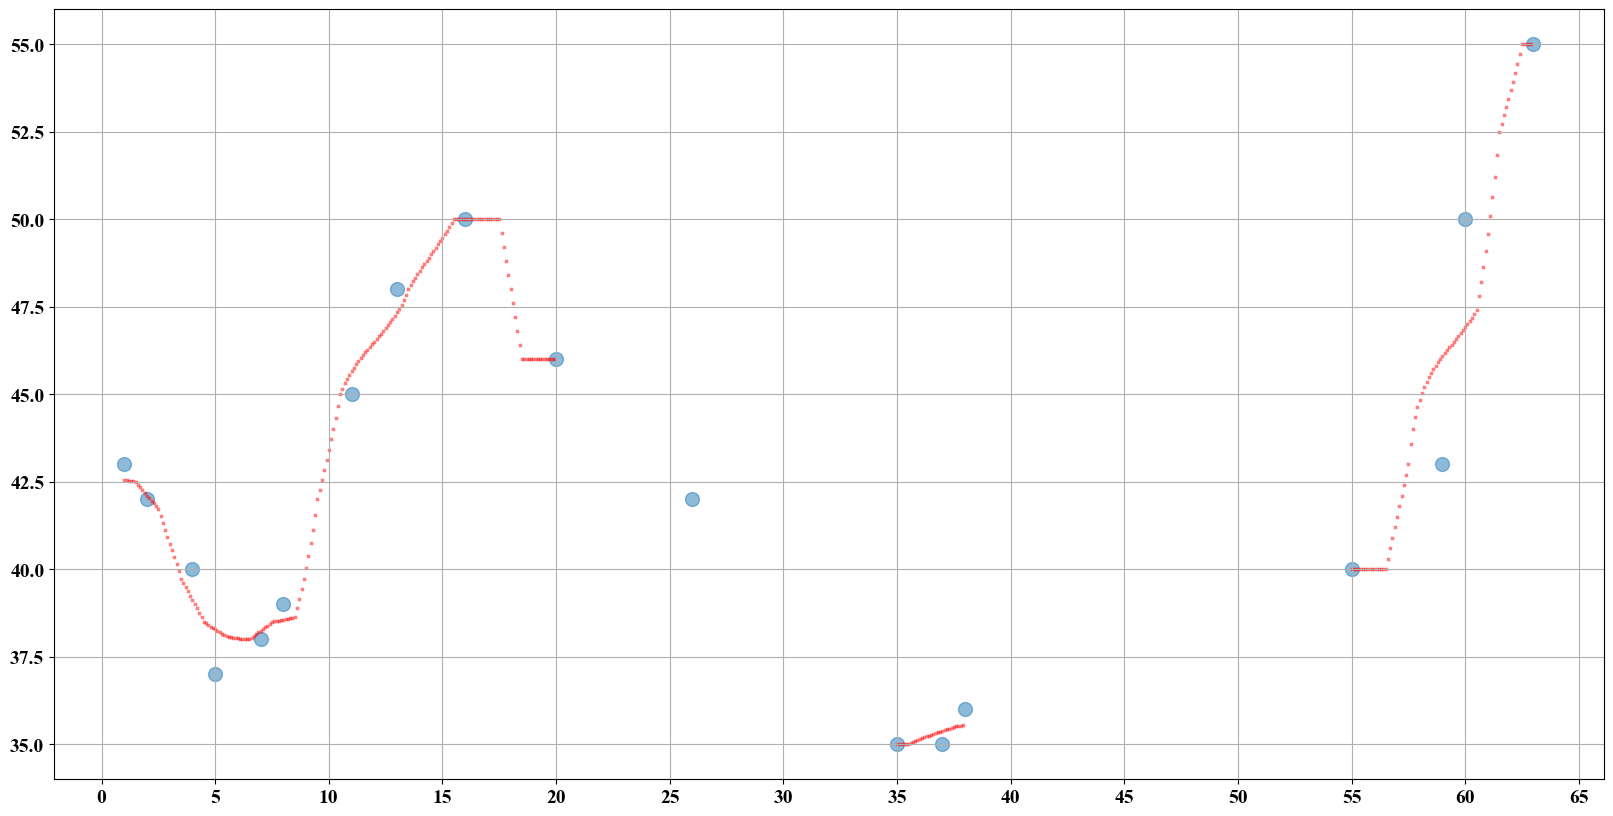

In [17]:
plt.figure(figsize=(20,10))
plt.scatter([1,2,4,5,7,8,11,13,16,20,26,35,37,38,55,59,60,63],[43,42,40,37,38,39,45,48,50,46,42,35,35,36,40,43,50,55],alpha=0.5,s=100)
aaa,bbb=broken_smooth(smooth_fwhm,[1,2,4,5,7,8,11,13,16,20,26,35,37,38,55,59,60,63],[43,42,40,37,38,39,45,48,50,46,42,35,35,36,40,43,50,55],5)
plt.scatter(aaa,bbb,color='r',marker='x',s=4,alpha=0.5)
plt.grid()
plt.xticks(np.arange(0,70,5),np.arange(0,70,5))

In [18]:
Decent_Dust_index_list=[]
nova_t0_index_list=[]
Kdate_list=[]
Kmag_list=[]
Kerror_list=[]
Hdate_list=[]
Hmag_list=[]
Herror_list=[]
Jdate_list=[]
Jmag_list=[]
Jerror_list=[]
Idate_list=[]
Imag_list=[]
Ierror_list=[]
Rdate_list=[]
Rmag_list=[]
Rerror_list=[]
Vdate_list=[]
Vmag_list=[]
Verror_list=[]
Bdate_list=[]
Bmag_list=[]
Berror_list=[]
V_threepiecefit_date_list=[]
V_threepiecefit_mag_list=[]
JV_daylist_list=[]
JV_maglist_list=[]
JV_decline_day_linfit_list=[]
JV_decline_mag_linfit_list=[]
JV_recover_day_linfit_list=[]
JV_recover_mag_linfit_list=[]
len_JV_daylist500_list=[]
xd_list=[]
popt_list=[]
JV_daylistsmooth_list=[]
JV_maglistsmooth_list=[]
Kbandname='K band'
Kcolor='k'
Hbandname='H band'
Hcolor='r'
Jbandname='J band'
Jcolor='c'
Ibandname='I band'
Icolor='m'
Rbandname='R band'
Rcolor='gold'
Vbandname='V band'
Vcolor='lime'
Bbandname='B band'
Bcolor='b'
JVcolor='k'
JVlabel='V-J band'
JV_linfit_color='r'
JV_linfit_label='Linear Fit'
JVsmoothcolor='lime'
JVsmoothlabel='V-J smoothed'
aavsoVcolor='greenyellow'
aavsoVlabel='AAVSO V band'
aavsoCVcolor='yellowgreen'
aavsoCVlabel='AAVSO CV band'

In [19]:
for file_num in range(int(len(files)/2)):

    #declare files to be indexed
    file1=files[file_num*2]
    filename1=filenames[file_num*2]
    file2=files[file_num*2+1]
    filename2=filenames[file_num*2+1]

    #find t_0
    nova_t0_index=int(np.where(filenames_arr==filename1)[0])
    t0_JD=eruption_dates_arr[nova_t0_index]
    t0=t0_JD - 2450000.0

    #filter with "Decent_Lightcurves_Chart.csv"
    Decent_Dust_index=int(np.where(Decent_Dust_Names==names_arr[nova_t0_index])[0])

    #AAVSO data
    if len(np.where(AAVSOfilenames_indexarr==Decent_Dust_index)[0])==1:
        AAVSOfilepresent=True
        AAVSOfile=AAVSOfiles[np.where(AAVSOfilenames_indexarr==Decent_Dust_index)[0][0]]
        AAVSOdate,AAVSOmag,AAVSOerr,AAVSOband=AAVSOfile
    else:
        AAVSOfilepresent=False
    
    if Decent_Dust_geq_20[Decent_Dust_index]==1:
        #first file (ir)
        #variables,convert strings to floats (where applicable)
        date_nomask1=[]
        Kdate,Hdate,Jdate=[],[],[]
        for no in file1[0]:
            date_nomask1.append(float(no))
        band1=file1[1]
        mag_nomask1=[]
        Kmag,Hmag,Jmag=[],[],[]
        for no in file1[2]:
            mag_nomask1.append(float(no))
        error_nomask1=[]
        Kerror,Herror,Jerror=[],[],[]
        for no in file1[3]:
            error_nomask1.append(float(no))
        #mask   
        K_arr=np.where(band1=='K')[0]
        for ii in K_arr:
            Kdate.append(date_nomask1[ii] - t0)
            Kmag.append(mag_nomask1[ii])
            Kerror.append(error_nomask1[ii])
        poplist=np.where(np.asarray(Kerror)>=0.5)[0]
        for i,ii in enumerate(poplist):
            Kdate.pop(ii-i)
            Kmag.pop(ii-i)
            Kerror.pop(ii-i)
        H_arr=np.where(band1=='H')[0]
        for ii in H_arr:
            Hdate.append(date_nomask1[ii] - t0)
            Hmag.append(mag_nomask1[ii])
            Herror.append(error_nomask1[ii])
        poplist=np.where(np.asarray(Herror)>=0.5)[0]
        for i,ii in enumerate(poplist):
            Hdate.pop(ii-i)
            Hmag.pop(ii-i)
            Herror.pop(ii-i)
        J_arr=np.where(band1=='J')[0]
        for ii in J_arr:
            Jdate.append(date_nomask1[ii] - t0)
            Jmag.append(mag_nomask1[ii])
            Jerror.append(error_nomask1[ii])
        poplist=np.where(np.asarray(Jerror)>=0.5)[0]
        for i,ii in enumerate(poplist):
            Jdate.pop(ii-i)
            Jmag.pop(ii-i)
            Jerror.pop(ii-i)

        #second file (opt)
        date_nomask2=[]
        Idate,Rdate,Vdate,Bdate=[],[],[],[]
        for no in file2[0]:
            date_nomask2.append(float(no))
        band2=file2[1]
        mag_nomask2=[]
        Imag,Rmag,Vmag,Bmag=[],[],[],[]
        for no in file2[2]:
            mag_nomask2.append(float(no))
        error_nomask2=[]
        Ierror,Rerror,Verror,Berror=[],[],[],[]
        for no in file2[3]:
            error_nomask2.append(float(no))
        #mask        
        I_arr=np.where(band2=='I')[0]
        for ii in I_arr:
            Idate.append(date_nomask2[ii] - t0)
            Imag.append(mag_nomask2[ii])
            Ierror.append(error_nomask2[ii])
        poplist=np.where(np.asarray(Ierror)>=0.5)[0]
        for i,ii in enumerate(poplist):
            Idate.pop(ii-i)
            Imag.pop(ii-i)
            Ierror.pop(ii-i)
        R_arr=np.where(band2=='R')[0]
        for ii in R_arr:
            Rdate.append(date_nomask2[ii] - t0)
            Rmag.append(mag_nomask2[ii])
            Rerror.append(error_nomask2[ii])
        poplist=np.where(np.asarray(Rerror)>=0.5)[0]
        for i,ii in enumerate(poplist):
            Rdate.pop(ii-i)
            Rmag.pop(ii-i)
            Rerror.pop(ii-i)
        V_arr=np.where(band2=='V')[0]
        for ii in V_arr:
            Vdate.append(date_nomask2[ii] - t0)
            Vmag.append(mag_nomask2[ii])
            Verror.append(error_nomask2[ii])
        poplist=np.where(np.asarray(Verror)>=0.5)[0]
        for i,ii in enumerate(poplist):
            Vdate.pop(ii-i)
            Vmag.pop(ii-i)
            Verror.pop(ii-i)
        B_arr=np.where(band2=='B')[0]
        for ii in B_arr:
            Bdate.append(date_nomask2[ii] - t0)
            Bmag.append(mag_nomask2[ii])
            Berror.append(error_nomask2[ii])
        poplist=np.where(np.asarray(Berror)>=0.5)[0]
        for i,ii in enumerate(poplist):
            Bdate.pop(ii-i)
            Bmag.pop(ii-i)
            Berror.pop(ii-i)
        
        if AAVSOfilepresent==True:
            #AAVSO data
            date_nomaskaavso=[]
            aavsoVdate,aavsoCVdate=[],[]
            for no in AAVSOdate:
                date_nomaskaavso.append(float(no))
            mag_nomaskaavso=[]
            aavsoVmag,aavsoCVmag=[],[]
            for no in AAVSOmag:
                no=no.lstrip('<>')
                mag_nomaskaavso.append(float(no))
            error_nomaskaavso=[]
            aavsoVerror,aavsoCVerror=[],[]
            for no in AAVSOerr:
                if len(no)==0:
                    no=0
                error_nomaskaavso.append(float(no))
            #AAVSO mask
            AAVSO_V_arr=np.where(AAVSOband=='V')[0]
            for ii in AAVSO_V_arr:
                aavsoVdate.append(date_nomaskaavso[ii] - t0)
                aavsoVmag.append(mag_nomaskaavso[ii])
                aavsoVerror.append(error_nomaskaavso[ii])
            poplist=np.where(np.asarray(Verror)>=0.5)[0]
            for i,ii in enumerate(poplist):
                aavsoVdate.pop(ii-i)
                aavsoVmag.pop(ii-i)
                aavsoVerror.pop(ii-i)
            AAVSO_CV_arr=np.where(AAVSOband=='CV')[0]
            for ii in AAVSO_CV_arr:
                aavsoCVdate.append(date_nomaskaavso[ii] - t0)
                aavsoCVmag.append(mag_nomaskaavso[ii])
                aavsoCVerror.append(error_nomaskaavso[ii])
            poplist=np.where(np.asarray(aavsoCVerror)>=0.5)[0]
            for i,ii in enumerate(poplist):
                aavsoCVdate.pop(ii-i)
                aavsoCVmag.pop(ii-i)
                aavsoCVerror.pop(ii-i)

        #Three-segment piecewise linear fit to V-band
        if Vdate[0]<250:
            Vstart,Vend=Vdate[0],250
            Vdate250,Vmag250=shortenlist(Vdate,Vmag,Vstart,Vend)
            if len(Vdate250)>6:
                xstart=Vdate250[0]
                xend=Vdate250[-1]
                x0splitstart=Vdate250[1]
                x0splitend=Vdate250[-3]
                x1splitstart=Vdate250[2]
                x1splitend=Vdate250[-2]
                vopt,vcov=curve_fit(threepiecewise_linear,Vdate250,Vmag250,bounds=((x0splitstart,x1splitstart,-np.inf,-np.inf,-np.inf,-np.inf),(x0splitend,x1splitend,np.inf,np.inf,np.inf,np.inf)))
                Vxd=np.linspace(Vdate250[0],250,1000)
                Vy=threepiecewise_linear(Vxd,*vopt) 
            else: 
                Vxd=[]
                Vy=[]
        else:
            Vxd=[]
            Vy=[]
#        threepiecefit=threepiecewise_fitter(Vdate,Vmag,func=threepiecewise_linear,xmax=250)
#        if type(threepiecefit)!=str:
#            vopt,vcov=threepiecefit
#            Vxd=np.linspace(Vdate250[0],250,1000)
#            Vy=threepiecewise_linear(Vxd,*vpopt) 
#        else: 
#            Vxd=[]
#            Vy=[]

#        if Vdate[0]<250:
#            Vstart,Vend=Vdate[0],250
#            Vdate250,Vmag250=shortenlist(Vdate,Vmag,Vstart,Vend)
#            if len(Vdate250)>6:
#                vopt,vcov=curve_fit(threepiecewise_linear,Vdate250,Vmag250)
#        threepiecefit=threepiecewise_fitter(Vdate,Vmag,func=threepiecewise_linear,xmax=250)
#        if type(threepiecefit)!=str:
#            vopt,vcov=threepiecefit
#            Vxd=np.linspace(Vdate250[0],250,1000)
#            Vy=threepiecewise_linear(Vxd,*vpopt) 
#        else: 
#            Vxd=[]
#            Vy=[]

        #average points in chunks that are within "chunksize" days of each other

        chunksize=3
        #first file

        avgKdate,avgKmag=avgchunks(Kdate,Kmag,chunksize=chunksize)
        avgHdate,avgHmag=avgchunks(Hdate,Hmag,chunksize=chunksize)
        avgJdate,avgJmag=avgchunks(Jdate,Jmag,chunksize=chunksize)
        avgIdate,avgImag=avgchunks(Idate,Imag,chunksize=chunksize)
        avgRdate,avgRmag=avgchunks(Rdate,Rmag,chunksize=chunksize)
        avgVdate,avgVmag=avgchunks(Vdate,Vmag,chunksize=chunksize)
        avgBdate,avgBmag=avgchunks(Bdate,Bmag,chunksize=chunksize)

        #derivative plots using averaged points
        #first file
            
        Kt_list1,Kdmag_dt_list1=derivchart(avgKdate,avgKmag)
        Ht_list1,Hdmag_dt_list1=derivchart(avgHdate,avgHmag)
        Jt_list1,Jdmag_dt_list1=derivchart(avgJdate,avgJmag)
        It_list2,Idmag_dt_list2=derivchart(avgIdate,avgImag)
        Rt_list2,Rdmag_dt_list2=derivchart(avgRdate,avgRmag)
        Vt_list2,Vdmag_dt_list2=derivchart(avgVdate,avgVmag)
        Bt_list2,Bdmag_dt_list2=derivchart(avgBdate,avgBmag)
        
        #colors
        JV_daylist,JV_maglist=Color(Jdate,Vdate,Jmag,Vmag)
        JVt_list,JVdmag_dt_list=derivchart(JV_daylist,JV_maglist)
               
        #shorter color arrays for curve fitting // split at minimum
        JV_decline_start=Decent_Dust_decline_start[Decent_Dust_index]
        JV_recover_end=Decent_Dust_recover_end[Decent_Dust_index]
        startholder=JV_daylist[0]
        JV_daylist500,JV_maglist500=shortenlist(JV_daylist,JV_maglist,startholder,500)
        if len(JV_daylist500)<1:
            JV_daylist500=[30]
            JV_maglist500=[6]
        if JV_daylist500[-1]<JV_recover_end:
            JV_recover_end=JV_daylist500[-1]
        if JV_daylist500[0]>JV_decline_start:
            JV_decline_start=JV_daylist500[0]
        minimum=JV_daylist500[np.argmax(np.asarray(JV_daylist500))]
        features.loc[Decent_Dust_Names[Decent_Dust_index],'biggest_change']=findchange(JV_daylist500,JV_maglist500)[0]
        
        magrange_comp=5
        top,bottom=np.percentile(JV_maglist500,[magrange_comp,100-magrange_comp])
        features.loc[Decent_Dust_Names[Decent_Dust_index],'mag_range']=(bottom-top)
        
        optsplit,optres=findoptsplit(JV_daylist500,JV_maglist500,JV_decline_start,JV_recover_end)
        JV_decline_daylist,JV_decline_maglist=[],[]
        JV_recover_daylist,JV_recover_maglist=[],[]
        if optsplit!=0:
            JV_decline_daylist,JV_decline_maglist=shortenlist(JV_daylist500,JV_maglist500,JV_decline_start,optsplit)
            JV_recover_daylist,JV_recover_maglist=shortenlist(JV_daylist500,JV_maglist500,optsplit,JV_recover_end)
            dec_p=np.polyfit(JV_decline_daylist,JV_decline_maglist,1)
            decfunc=np.poly1d(dec_p)
            features.loc[Decent_Dust_Names[Decent_Dust_index],'broken_m1']=dec_p[0]
            JV_decline_day_linfit=np.arange(int(JV_decline_start),int(optsplit))
            JV_decline_mag_linfit=decfunc(np.asarray(JV_decline_day_linfit))
            rec_p=np.polyfit(JV_recover_daylist,JV_recover_maglist,1)
            recfunc=np.poly1d(rec_p)
            features.loc[Decent_Dust_Names[Decent_Dust_index],'broken_m2']=rec_p[0]
            JV_recover_day_linfit=np.arange(int(optsplit),int(JV_recover_end))
            JV_recover_mag_linfit=recfunc(np.asarray(JV_recover_day_linfit))
        else:
            JV_decline_day_linfit=[]
            JV_decline_mag_linfit=[]
            JV_recover_day_linfit=[]
            JV_recover_mag_linfit=[]
        
        JV_decline_start=Decent_Dust_decline_start[Decent_Dust_index]
        JV_recover_end=Decent_Dust_recover_end[Decent_Dust_index]
        if JV_recover_end>500:
            JV_recover_end=500
        JV_daylist500,JV_maglist500=shortenlist(JV_daylist,JV_maglist,JV_decline_start,JV_recover_end)
        if len(JV_daylist500)<1:
            JV_daylist500=[30]
            JV_maglist500=[6]
        if JV_daylist500[-1]<JV_recover_end:
            JV_recover_end=JV_daylist500[-1]
        if JV_daylist500[0]>JV_decline_start:
            JV_decline_start=JV_daylist500[0]
        
        Vdate50,Vmag50=shortenlist(Vdate,Vmag,0,50)
        if len(Vmag50)>=1:
            Vpeak=np.max(Vmag50)
        else:
            Vpeak='na'
        features.loc[Decent_Dust_Names[Decent_Dust_index],'Vpeak']=Vpeak
        
        popt,pcov=[],[]
        p0_split=optsplit
        if len(JV_daylist500)>=4:
            if p0_split>=JV_daylist500[1] and p0_split<=JV_daylist500[-2] and len(JV_daylist500)>4:
                iterated_split=piecewise_fitter(JV_daylist500,JV_maglist500,piecewise_linear,[p0_split,0,0,0])
            else:
                iterated_split=p0_split
            popt,pcov=curve_fit(piecewise_linear,JV_daylist500,JV_maglist500,p0=[iterated_split,0,0,0])
            xd=np.linspace(JV_decline_start,JV_recover_end,1000)
            features.loc[Decent_Dust_Names[Decent_Dust_index],'cont_m1']=popt[2]
            features.loc[Decent_Dust_Names[Decent_Dust_index],'cont_m2']=popt[3]

            drophistlistapp=piecewise_linear(popt[0],*popt)-piecewise_linear(xd[0],*popt)
            features.loc[Decent_Dust_Names[Decent_Dust_index],'big_drop']=drophistlistapp
            risehistlistapp=piecewise_linear(xd[-1],*popt)-piecewise_linear(popt[1],*popt)
            features.loc[Decent_Dust_Names[Decent_Dust_index],'big_rise']=risehistlistapp
        else:
            xd=[]
            popt,pcov=[],[]
            
        #finding greatest change in v-k color from max in V band
        outlier_ind_list=[]
        for i,mag in enumerate(Vmag):
            if len(np.where((np.abs(np.asarray(Vmag)-mag))<1)[0])<1:
                outlier_ind_list.append(i)
        Vmag_nooutliers=np.delete(np.asarray(Vmag),outlier_ind_list)
        Vdate_nooutliers=np.delete(np.asarray(Vdate),outlier_ind_list)
        Vmag_before500=(np.where(Vdate_nooutliers<500)[0])[-1]
        Vmag_before500list=[]
        for ii in range(Vmag_before500+1):
            Vmag_before500list.append(Vmag_nooutliers[ii])
        Vmaxdate=Vdate_nooutliers[np.argmin(np.asarray(Vmag_before500list))]
        outlier_ind_list=[]
        for i,mag in enumerate(JV_maglist500):
            if len(np.where((np.abs(np.asarray(JV_maglist500)-mag))<1)[0])<1:
                outlier_ind_list.append(i)
        JV_daylist500_nooutliers=np.delete(np.asarray(JV_daylist500),outlier_ind_list)
        JV_maglist500_nooutliers=np.delete(np.asarray(JV_maglist500),outlier_ind_list)
        JVclosest=np.argmin(np.asarray(JV_daylist500_nooutliers)-Vmaxdate)
        JVfurthest=np.argmax(np.abs(np.asarray(JV_maglist500_nooutliers)-JV_maglist500_nooutliers[JVclosest]))
        day_change_from_max=JV_daylist500_nooutliers[JVfurthest]-JV_daylist500_nooutliers[JVclosest]
        mag_change_from_max=JV_maglist500_nooutliers[JVfurthest]-JV_maglist500_nooutliers[JVclosest]
        features.loc[Decent_Dust_Names[Decent_Dust_index],'color_change_from_vmax']=mag_change_from_max
        features.loc[Decent_Dust_Names[Decent_Dust_index],'day_change_from_vmax']=day_change_from_max
        #print(names_arr[nova_t0_index],JVfurthest,JVclosest,Vmaxdate)
        
        #finding change in v and k band brightness during interval between v-band max and greatest following v-k color change
        Vdatevjchange,Vmagvjchange=shortenlist(Vdate,Vmag,JV_daylist500_nooutliers[JVclosest],JV_daylist500_nooutliers[JVfurthest])
        Kdatevjchange,Kmagvjchange=shortenlist(Kdate,Kmag,JV_daylist500_nooutliers[JVclosest],JV_daylist500_nooutliers[JVfurthest])
        if len(Vdatevjchange)>1 and len(Kdatevjchange)>1:
            features.loc[Decent_Dust_Names[Decent_Dust_index],'vband_change_over_interval']=Vmagvjchange[-1]-Vmagvjchange[0]
            features.loc[Decent_Dust_Names[Decent_Dust_index],'jband_change_over_interval']=Kmagvjchange[-1]-Kmagvjchange[0]
            
        #smoother for v-k color
        JV_daylistsmooth,JV_maglistsmooth=broken_smooth(smooth_fwhm,JV_daylist,JV_maglist,5)
        
        #AAVSO data
        # if 0!=np.size(np.where(AAVSOfilenames==(Decent_Dust_official[Decent_Dust_index].replace(' ','_')+".txt"))[0]):
        #     aavsolistind=int(np.where(AAVSOfilenames==(Decent_Dust_official[Decent_Dust_index].replace(' ','_')+".txt"))[0])
        #     aavsoDate,aavsoMag,aavsoError,aavsoBand=AAVSOfiles[aavsolistind]
        
        #main plot
        Decent_Dust_index_list.append(Decent_Dust_index)
        nova_t0_index_list.append(nova_t0_index)
        Kdate_list.append(Kdate)
        Kmag_list.append(Kmag)
        Kerror_list.append(Kerror)
        Hdate_list.append(Hdate)
        Hmag_list.append(Hmag)
        Herror_list.append(Herror)
        Jdate_list.append(Jdate)
        Jmag_list.append(Jmag)
        Jerror_list.append(Jerror)
        Idate_list.append(Idate)
        Imag_list.append(Imag)
        Ierror_list.append(Ierror)
        Rdate_list.append(Rdate)
        Rmag_list.append(Rmag)
        Rerror_list.append(Rerror)
        Vdate_list.append(Vdate)
        Vmag_list.append(Vmag)
        Verror_list.append(Verror)
        Bdate_list.append(Bdate)
        Bmag_list.append(Bmag)
        Berror_list.append(Berror)
        V_threepiecefit_date_list.append(Vxd)
        V_threepiecefit_mag_list.append(Vy)
        if len(JV_daylist500)>=4:
            JV_daylist_list.append(JV_daylist)
            JV_maglist_list.append(JV_maglist)
            xd_list.append(xd)
            popt_list.append(popt)
        else:
            JV_daylist_list.append([])
            JV_maglist_list.append([])
            xd_list.append([])
            popt_list.append([])
        len_JV_daylist500_list.append(int(len(JV_daylist500)))
        JV_decline_day_linfit_list.append(JV_decline_day_linfit)
        JV_decline_mag_linfit_list.append(JV_decline_mag_linfit)
        JV_recover_day_linfit_list.append(JV_recover_day_linfit)
        JV_recover_mag_linfit_list.append(JV_recover_mag_linfit)
        JV_daylistsmooth_list.append(JV_daylistsmooth)
        JV_maglistsmooth_list.append(JV_maglistsmooth)

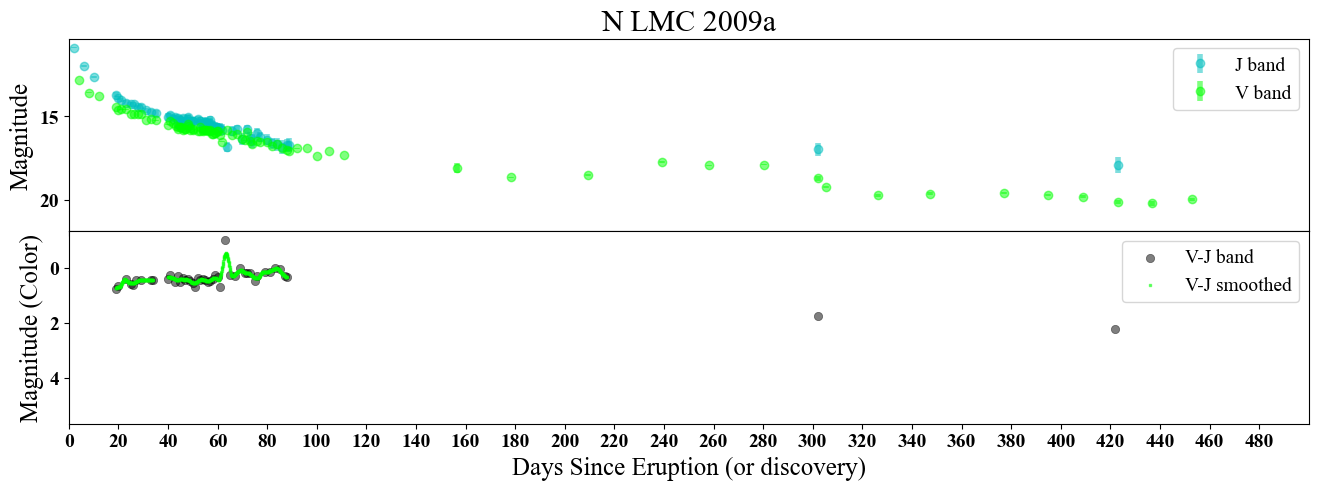

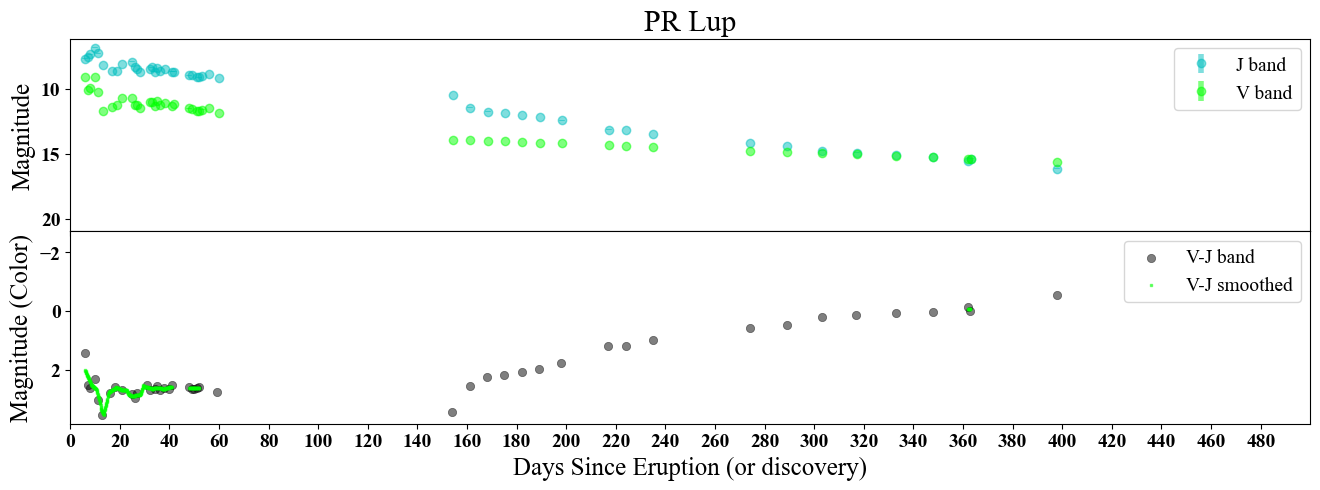

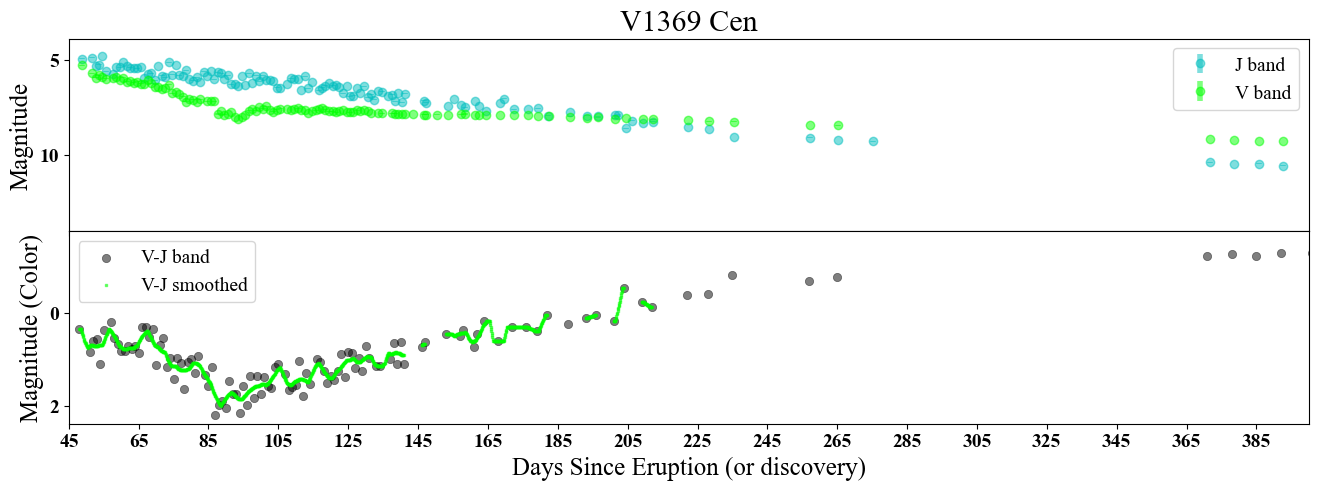

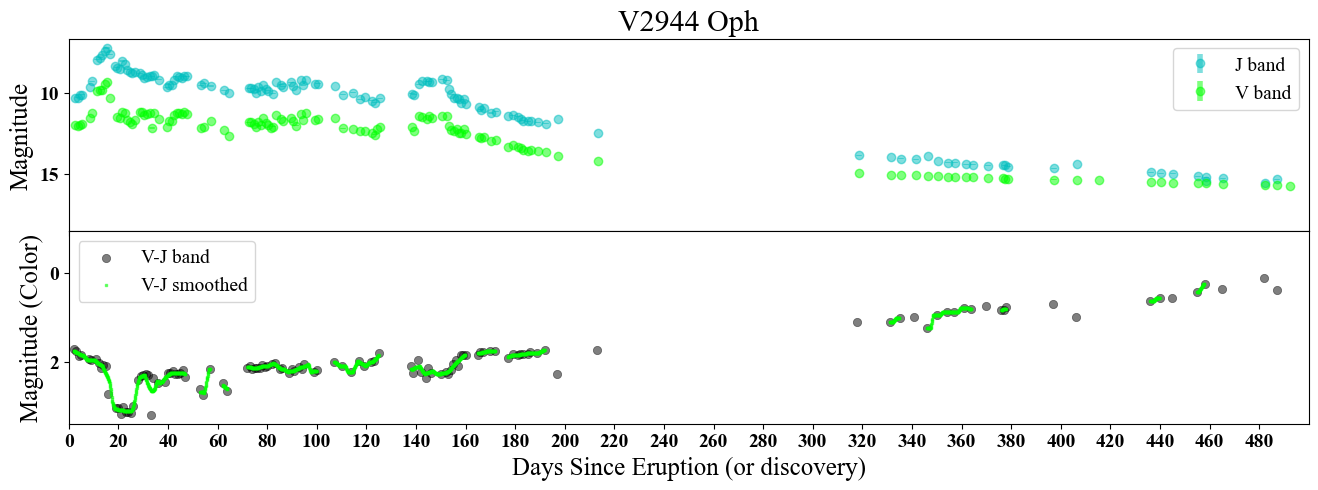

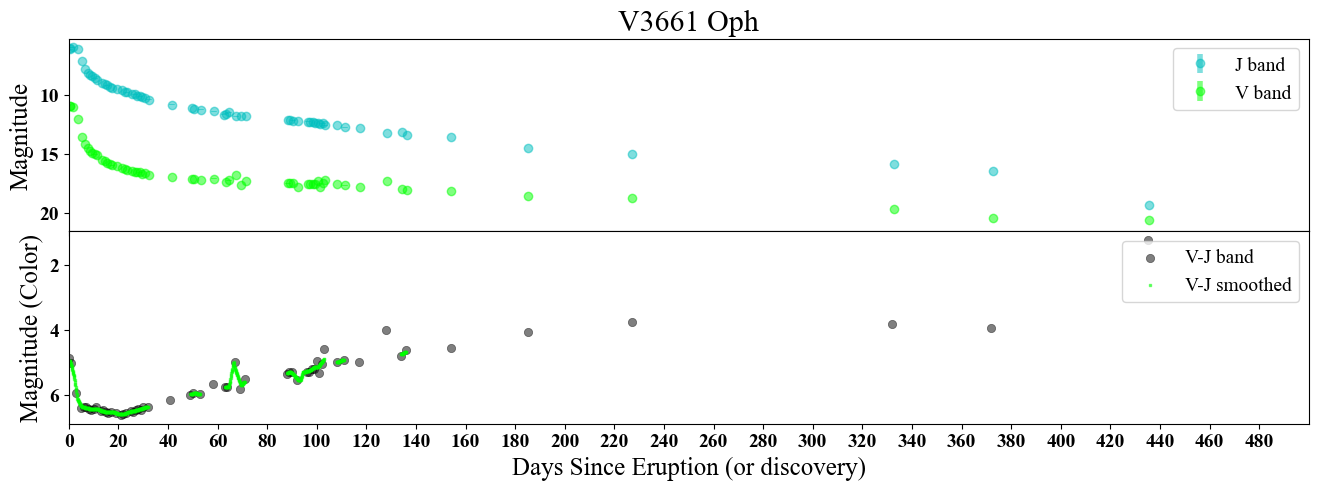

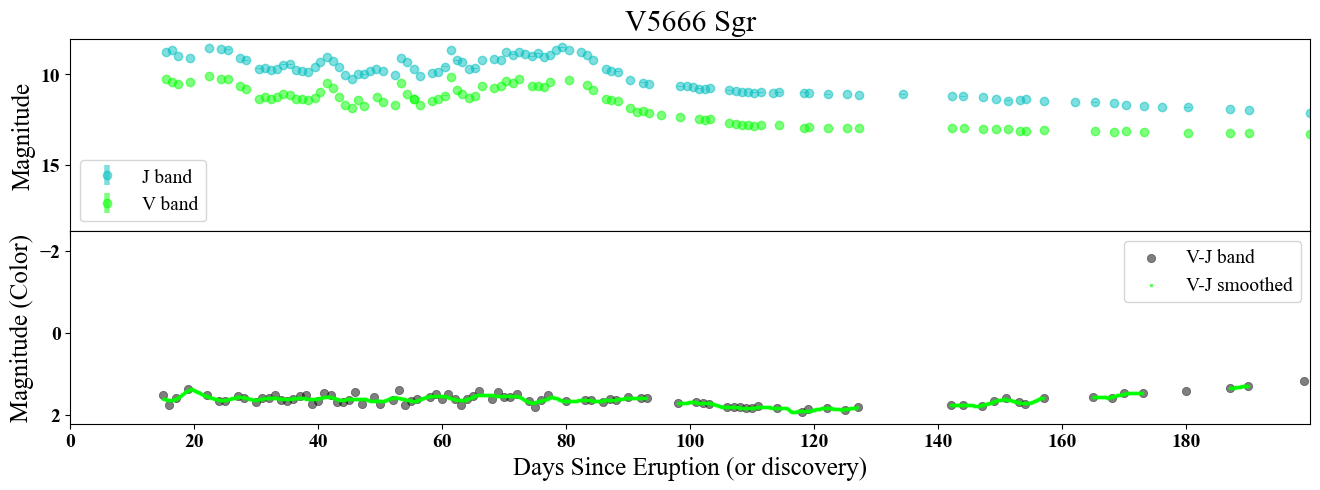

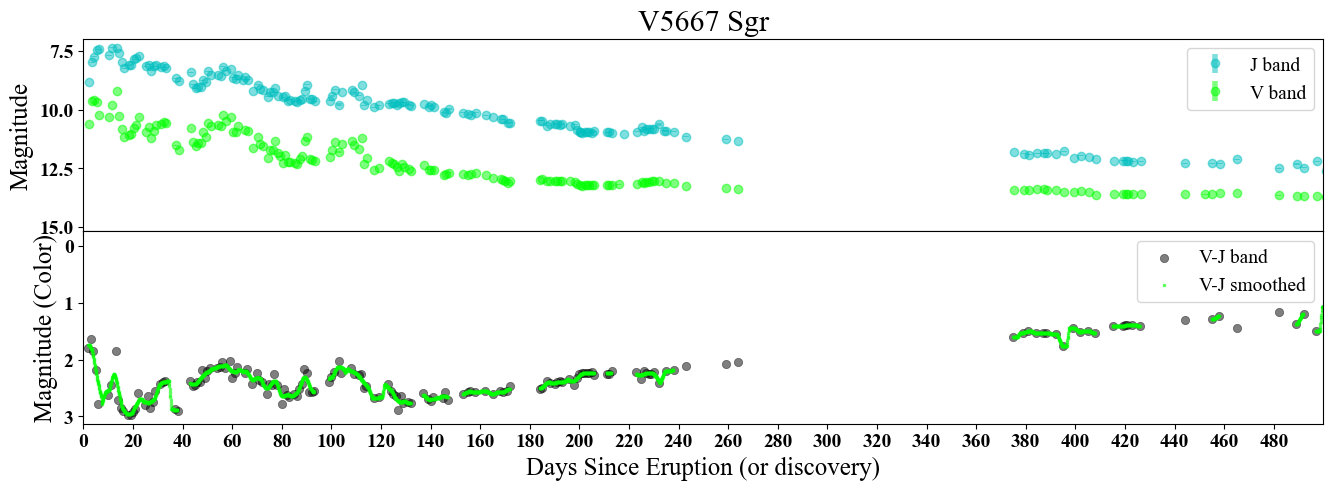

In [20]:
#main plots for unsure
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==-1:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Hdate=Hdate_list[ii]
        Hmag=Hmag_list[ii]
        Herror=Herror_list[ii]
        Jdate=Jdate_list[ii]
        Jmag=Jmag_list[ii]
        Jerror=Jerror_list[ii]
        Idate=Idate_list[ii]
        Imag=Imag_list[ii]
        Ierror=Ierror_list[ii]
        Rdate=Rdate_list[ii]
        Rmag=Rmag_list[ii]
        Rerror=Rerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        Bdate=Bdate_list[ii]
        Bmag=Bmag_list[ii]
        Berror=Berror_list[ii]
        Vdx=V_threepiecefit_date_list[ii]
        Vy=V_threepiecefit_mag_list[ii]
        JV_daylist=JV_daylist_list[ii]
        JV_maglist=JV_maglist_list[ii]
        JV_decline_day_linfit=JV_decline_day_linfit_list[ii]
        JV_decline_mag_linfit=JV_decline_mag_linfit_list[ii]
        JV_recover_day_linfit=JV_recover_day_linfit_list[ii]
        JV_recover_mag_linfit=JV_recover_mag_linfit_list[ii]
        insufficient_points_filter=len_JV_daylist500_list[ii]
        xd=xd_list[ii]
        popt=popt_list[ii]
        JV_daylistsmooth=JV_daylistsmooth_list[ii]
        JV_maglistsmooth=JV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,5)
        fig.subplots_adjust(hspace=0)
#        ax1.scatter(Kdate,Kmag,color=Kcolor,label=Kbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Hdate,Hmag,color=Hcolor,label=Hbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Jdate,Jmag,color=Jcolor,label=Jbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Idate,Imag,color=Icolor,label=Ibandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Rdate,Rmag,color=Rcolor,label=Rbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Vdate,Vmag,color=Vcolor,label=Vbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Bdate,Bmag,color=Bcolor,label=Bbandname,alpha=0.5,lw=0.5)
#        ax1.errorbar(Kdate,Kmag,yerr=Kerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Hdate,Hmag,yerr=Herror,elinewidth=4,color=Hcolor,label=Hbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Jdate,Jmag,yerr=Jerror,elinewidth=4,color=Jcolor,label=Jbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Idate,Imag,yerr=Ierror,elinewidth=4,color=Icolor,label=Ibandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Rdate,Rmag,yerr=Rerror,elinewidth=4,color=Rcolor,label=Rbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Vdate,Vmag,yerr=Verror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Bdate,Bmag,yerr=Berror,elinewidth=4,color=Bcolor,label=Bbandname,alpha=0.5,ls='None',marker='o')
#        ax1.plot(Vdx,Vy,color=Vcolor,label=Vbandname+' fit',alpha=0.5,lw=1)
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(JV_daylist,JV_maglist,color=JVcolor,label=JVlabel,alpha=0.5,lw=0.5)
#        if insufficient_points_filter>=4:
#            ax2.plot(JV_decline_day_linfit,JV_decline_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(JV_recover_day_linfit,JV_recover_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(xd,piecewise_linear(xd,*popt),color='purple',label='Continuous Linear Fit',alpha=0.5,lw=2)
        ax2.scatter(JV_daylistsmooth,JV_maglistsmooth,color=JVsmoothcolor,label=JVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax2.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        savefigpath=r"C:\Users\Atticus Chong\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'_J.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')


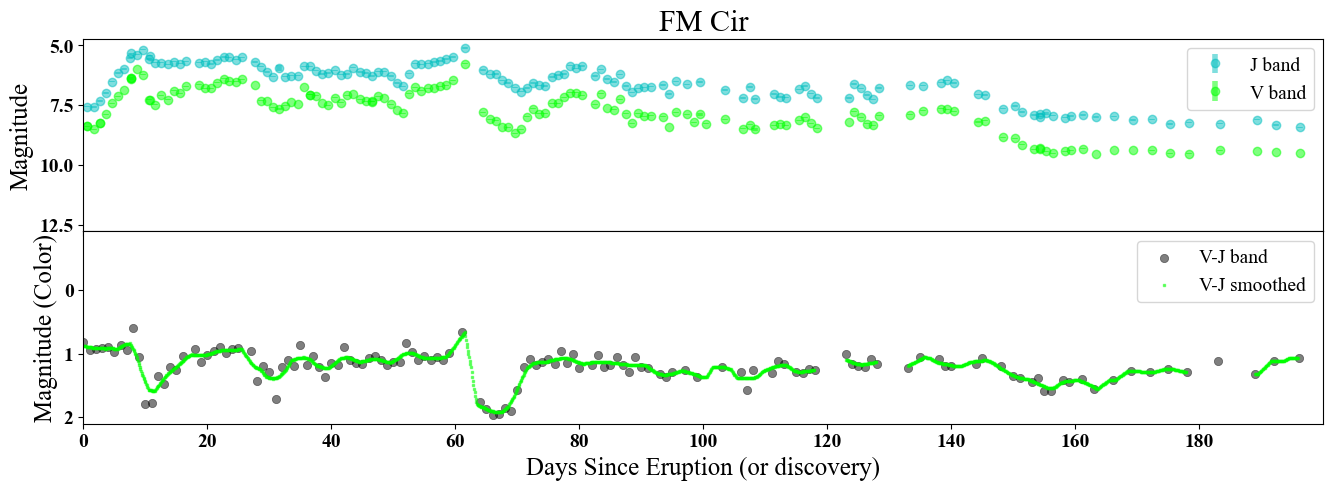

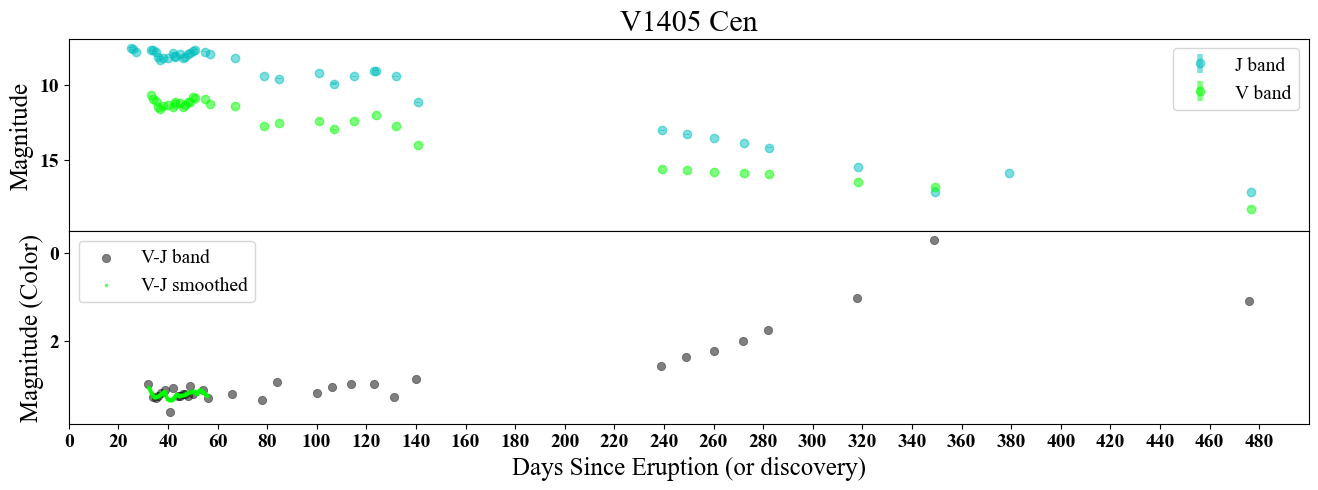

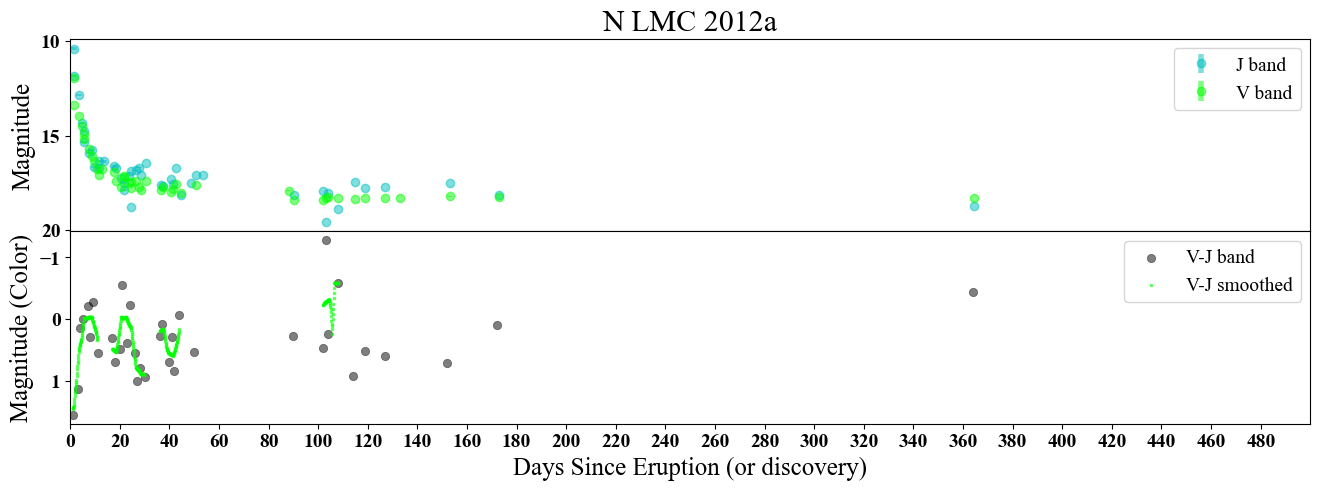

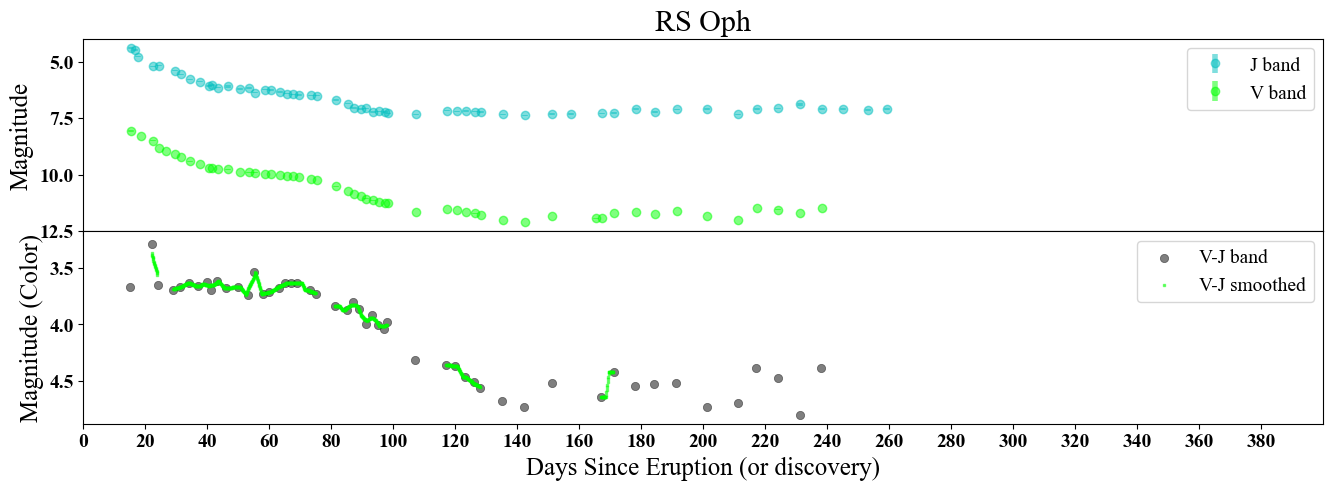

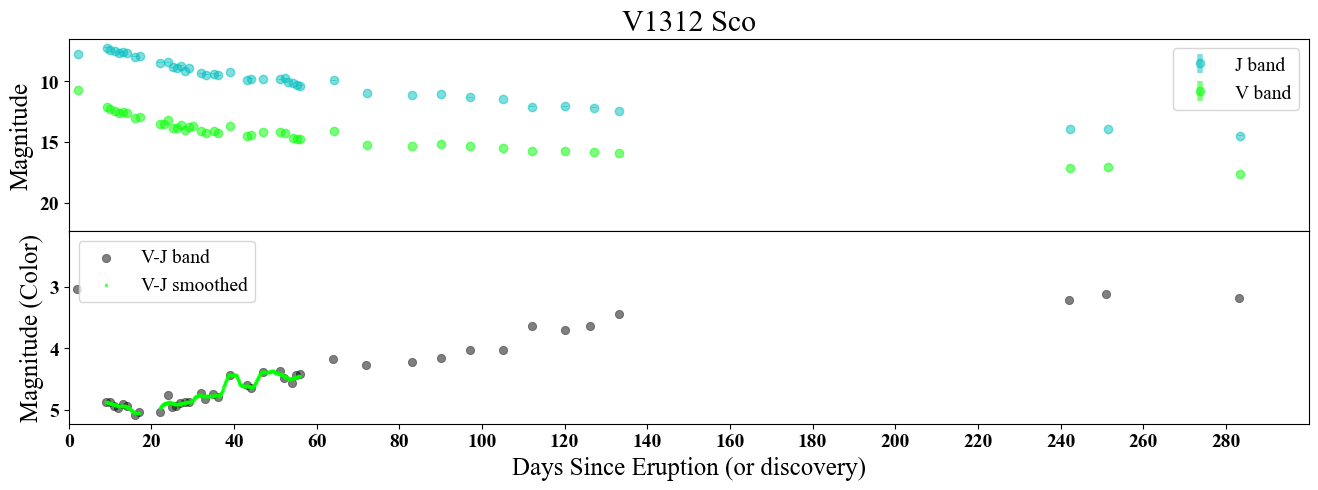

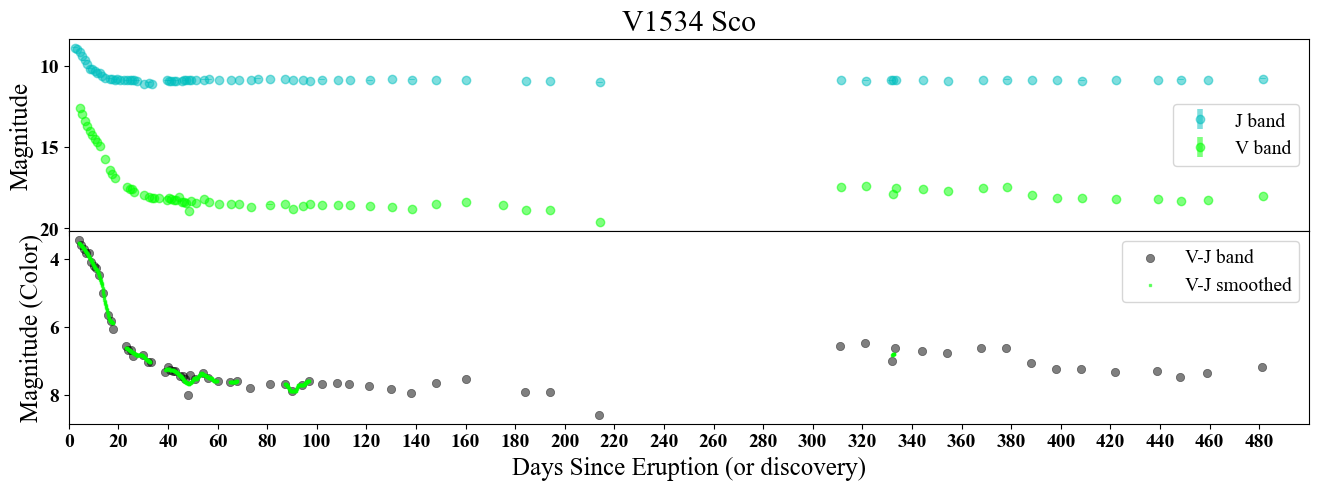

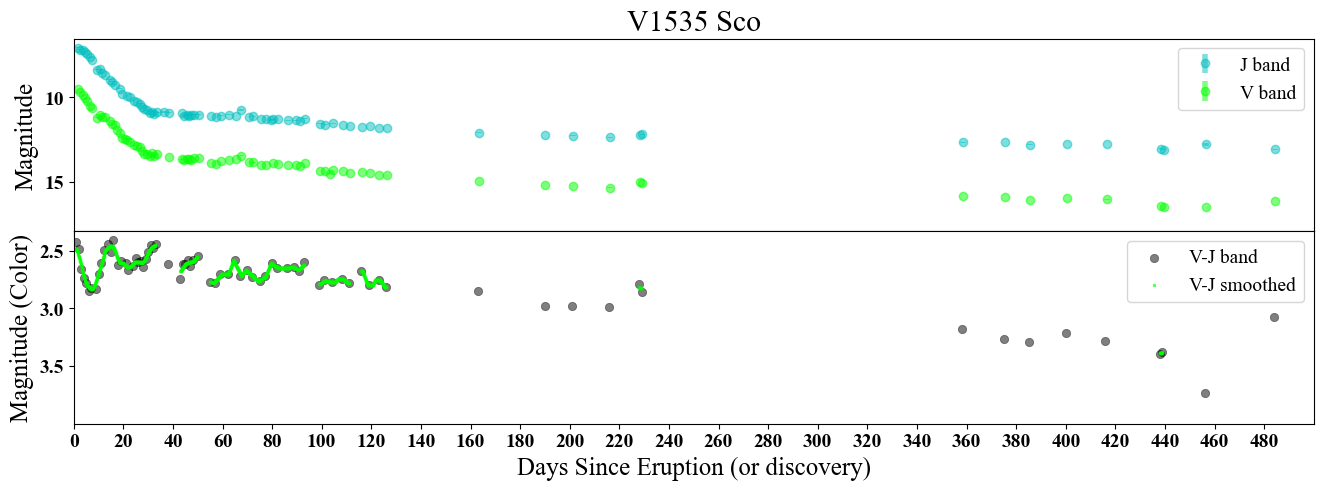

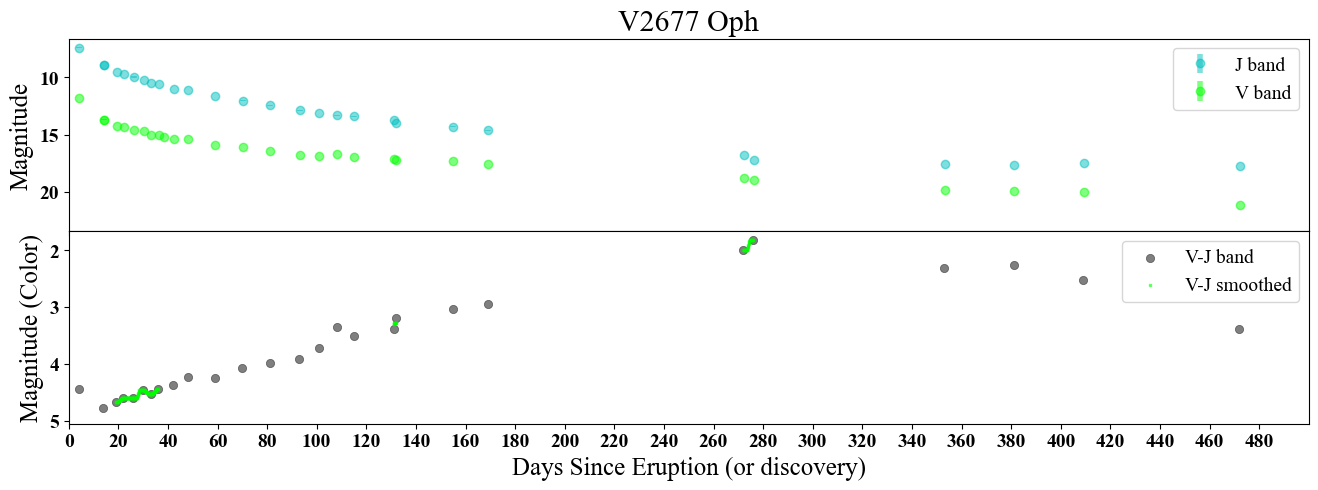

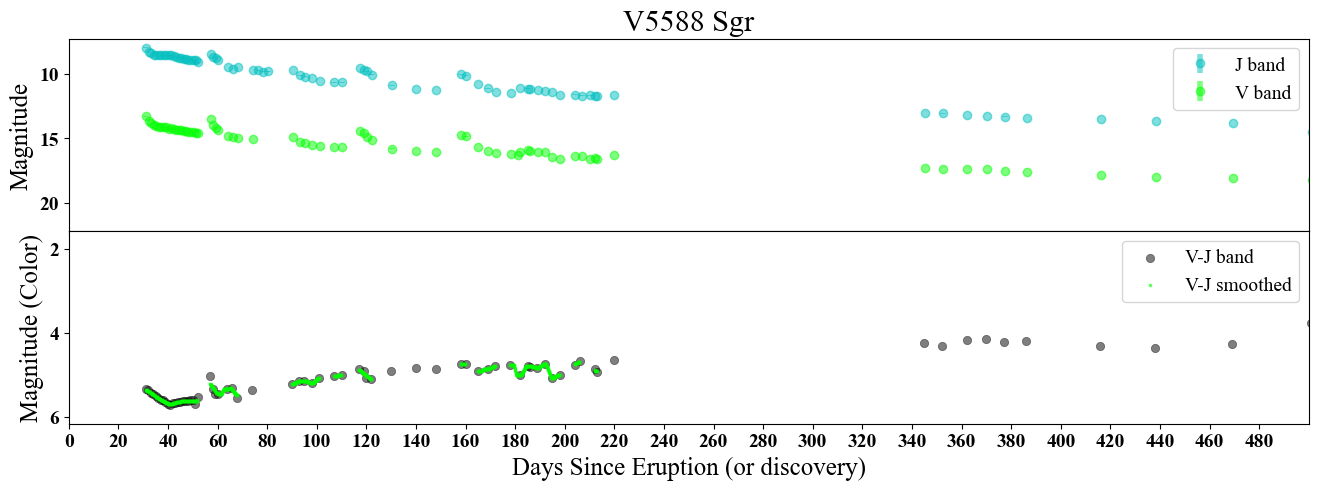

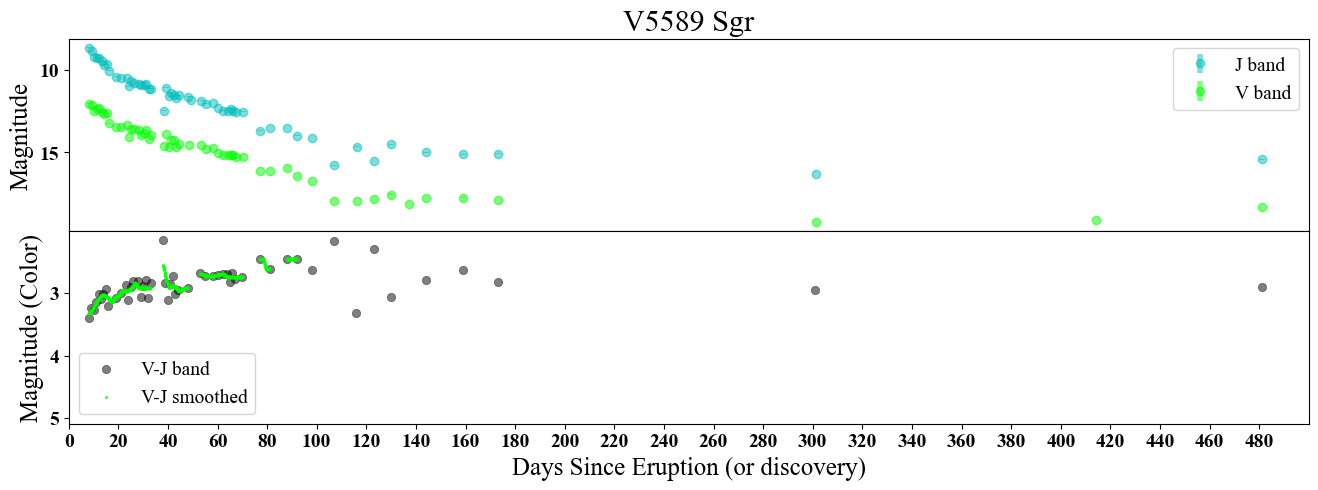

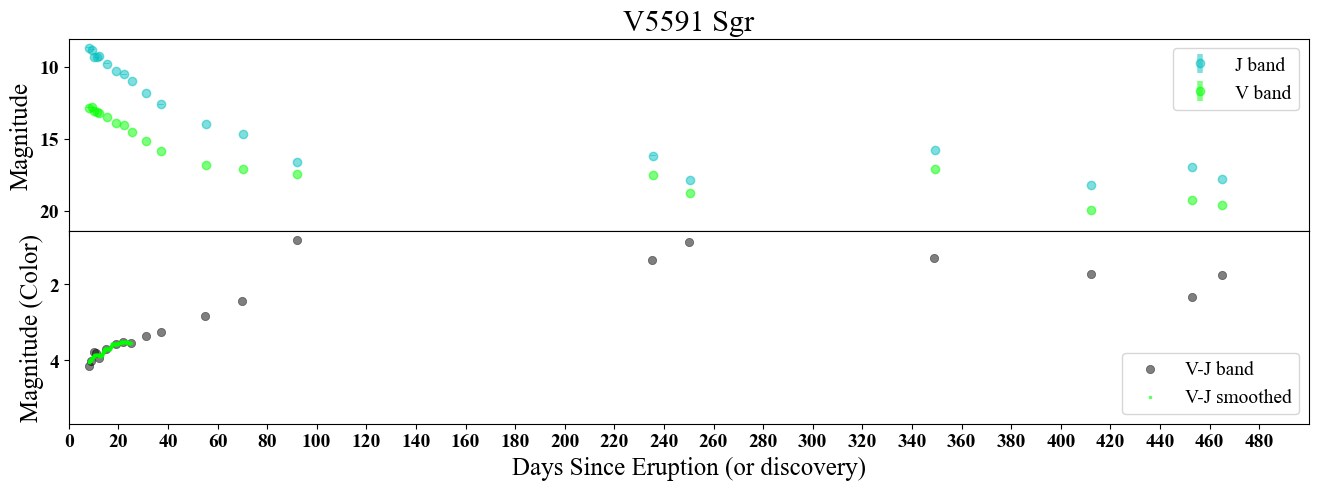

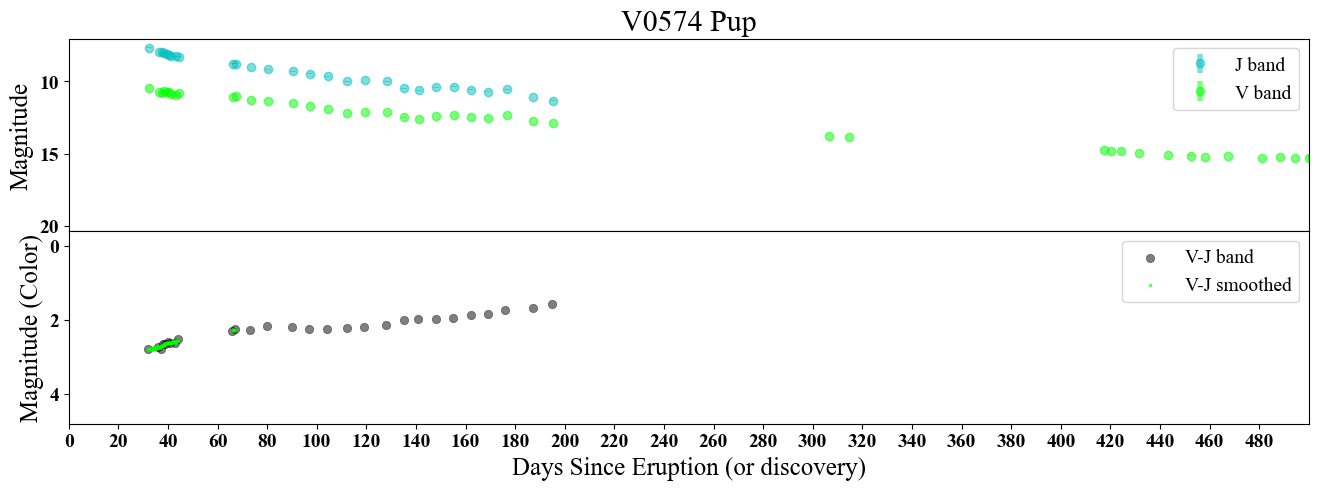

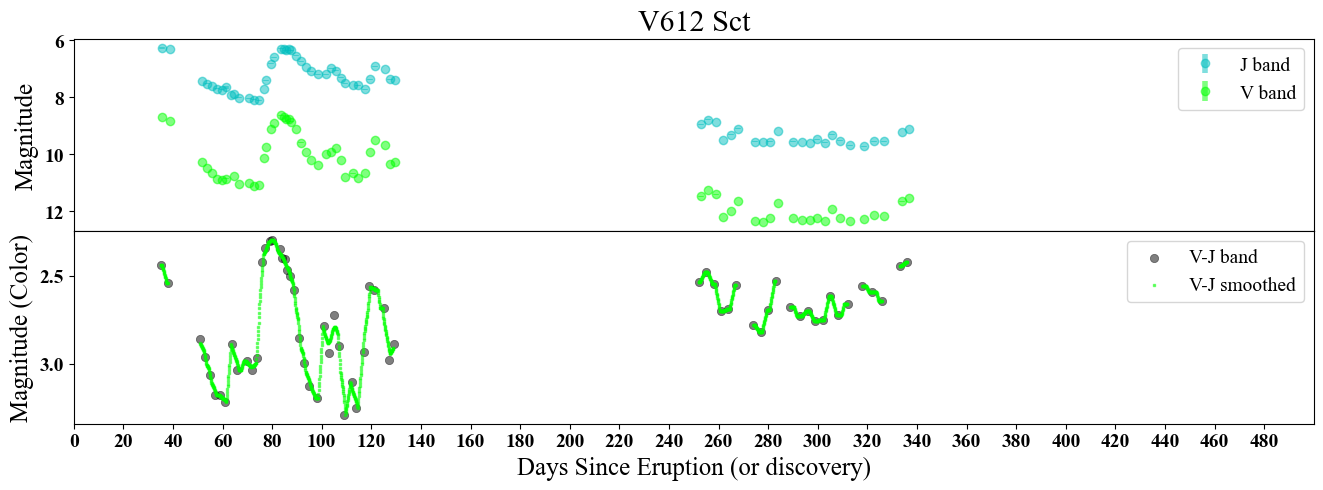

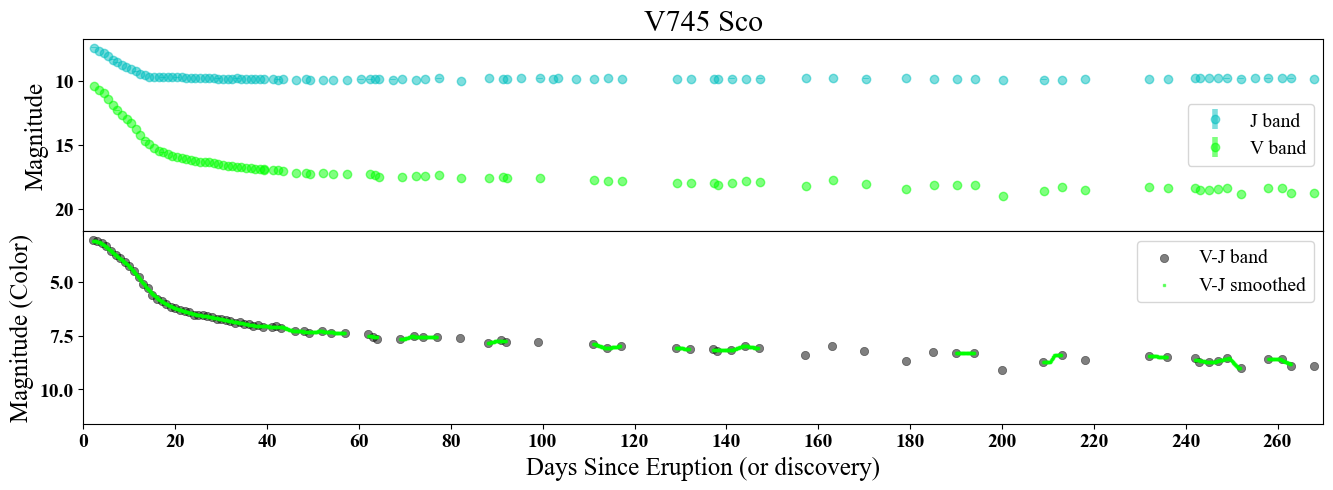

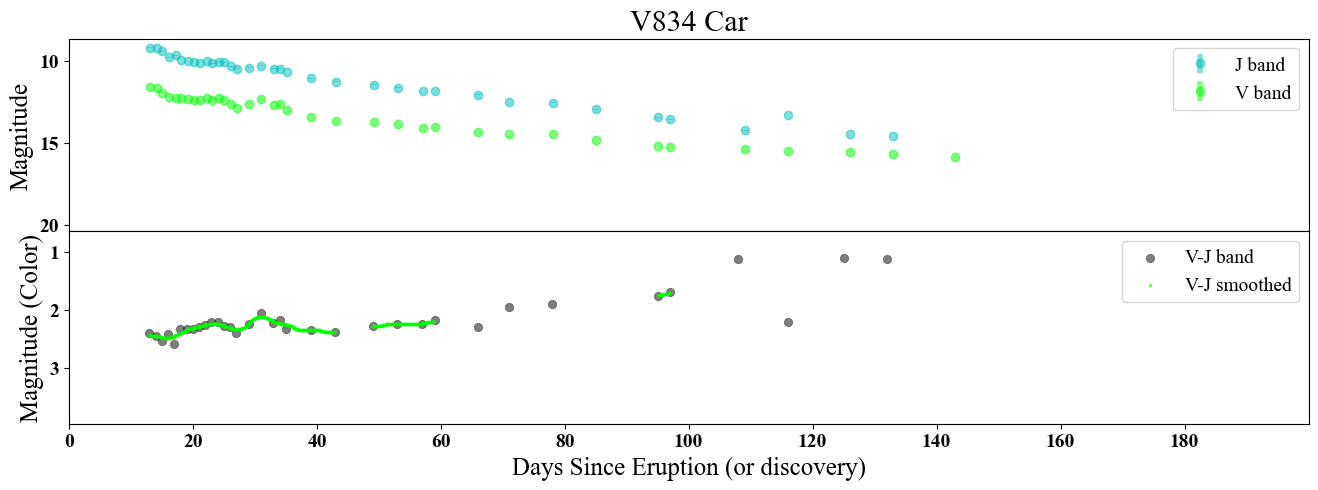

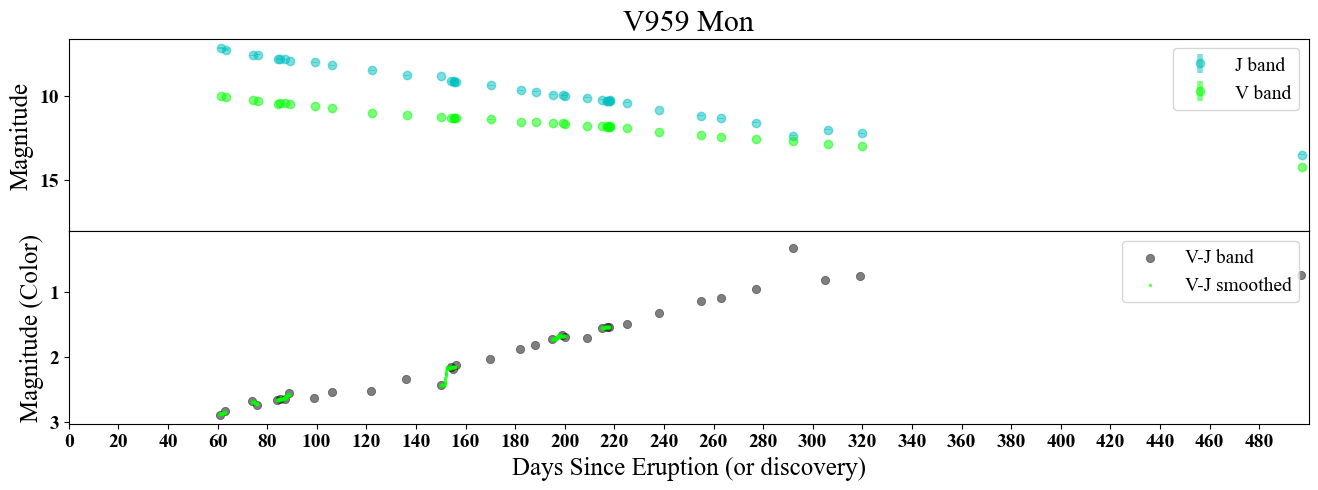

In [21]:
#main plots for none
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==0:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Hdate=Hdate_list[ii]
        Hmag=Hmag_list[ii]
        Herror=Herror_list[ii]
        Jdate=Jdate_list[ii]
        Jmag=Jmag_list[ii]
        Jerror=Jerror_list[ii]
        Idate=Idate_list[ii]
        Imag=Imag_list[ii]
        Ierror=Ierror_list[ii]
        Rdate=Rdate_list[ii]
        Rmag=Rmag_list[ii]
        Rerror=Rerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        Bdate=Bdate_list[ii]
        Bmag=Bmag_list[ii]
        Berror=Berror_list[ii]
        Vdx=V_threepiecefit_date_list[ii]
        Vy=V_threepiecefit_mag_list[ii]
        JV_daylist=JV_daylist_list[ii]
        JV_maglist=JV_maglist_list[ii]
        JV_decline_day_linfit=JV_decline_day_linfit_list[ii]
        JV_decline_mag_linfit=JV_decline_mag_linfit_list[ii]
        JV_recover_day_linfit=JV_recover_day_linfit_list[ii]
        JV_recover_mag_linfit=JV_recover_mag_linfit_list[ii]
        insufficient_points_filter=len_JV_daylist500_list[ii]
        xd=xd_list[ii]
        popt=popt_list[ii]
        JV_daylistsmooth=JV_daylistsmooth_list[ii]
        JV_maglistsmooth=JV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,5)
        fig.subplots_adjust(hspace=0)
#        ax1.scatter(Kdate,Kmag,color=Kcolor,label=Kbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Hdate,Hmag,color=Hcolor,label=Hbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Jdate,Jmag,color=Jcolor,label=Jbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Idate,Imag,color=Icolor,label=Ibandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Rdate,Rmag,color=Rcolor,label=Rbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Vdate,Vmag,color=Vcolor,label=Vbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Bdate,Bmag,color=Bcolor,label=Bbandname,alpha=0.5,lw=0.5)
#        ax1.errorbar(Kdate,Kmag,yerr=Kerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Hdate,Hmag,yerr=Herror,elinewidth=4,color=Hcolor,label=Hbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Jdate,Jmag,yerr=Jerror,elinewidth=4,color=Jcolor,label=Jbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Idate,Imag,yerr=Ierror,elinewidth=4,color=Icolor,label=Ibandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Rdate,Rmag,yerr=Rerror,elinewidth=4,color=Rcolor,label=Rbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Vdate,Vmag,yerr=Verror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Bdate,Bmag,yerr=Berror,elinewidth=4,color=Bcolor,label=Bbandname,alpha=0.5,ls='None',marker='o')
#        ax1.plot(Vdx,Vy,color=Vcolor,label=Vbandname+' fit',alpha=0.5,lw=1)
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(JV_daylist,JV_maglist,color=JVcolor,label=JVlabel,alpha=0.5,lw=0.5)
#        if insufficient_points_filter>=4:
#            ax2.plot(JV_decline_day_linfit,JV_decline_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(JV_recover_day_linfit,JV_recover_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(xd,piecewise_linear(xd,*popt),color='purple',label='Continuous Linear Fit',alpha=0.5,lw=2)
        ax2.scatter(JV_daylistsmooth,JV_maglistsmooth,color=JVsmoothcolor,label=JVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax2.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        savefigpath=r"C:\Users\Atticus Chong\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'_J.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

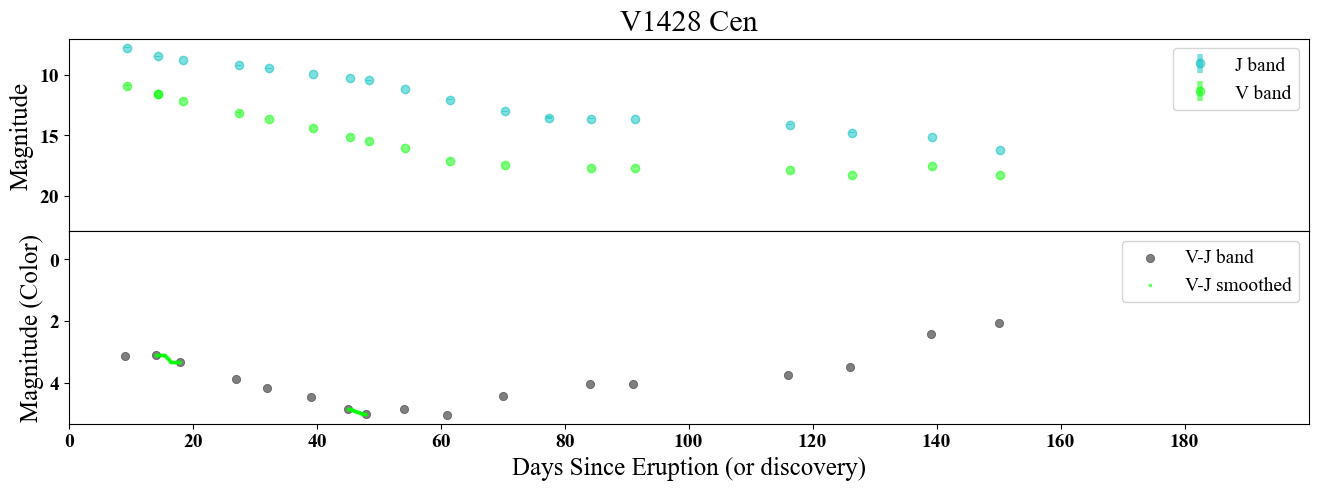

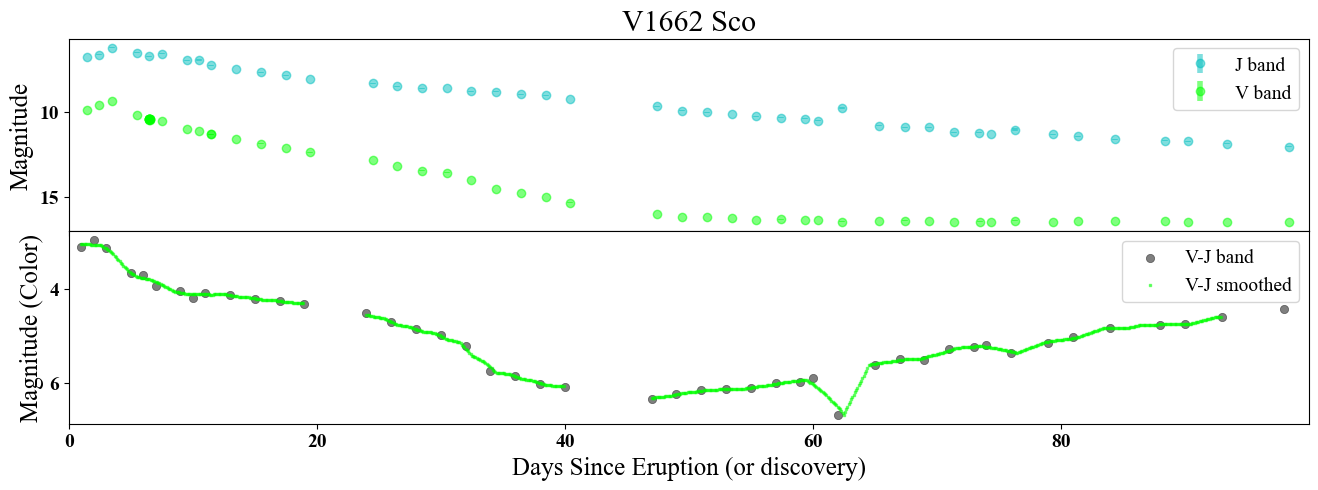

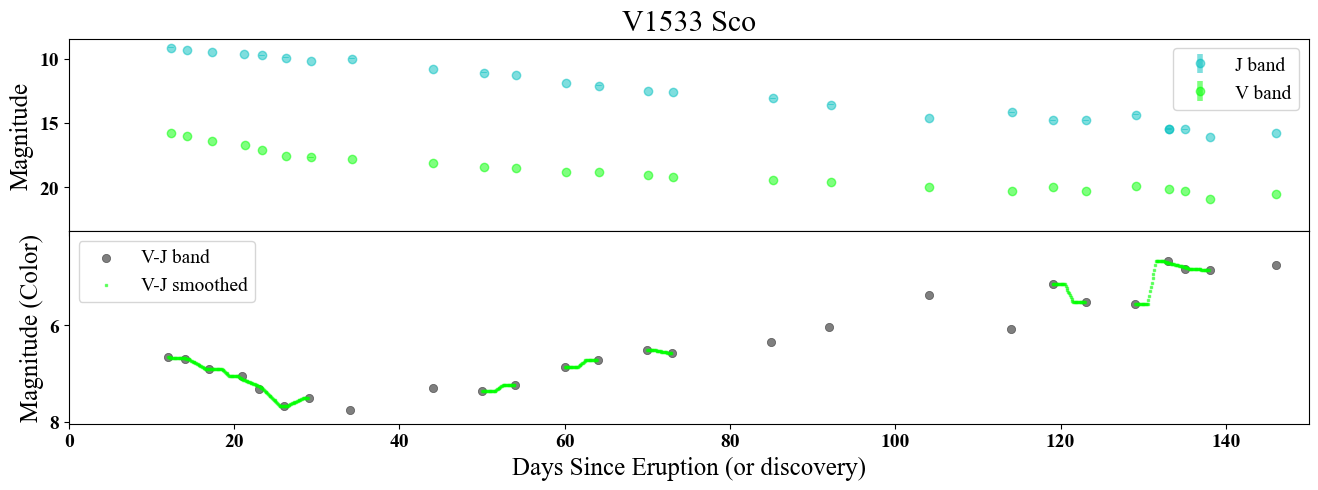

In [22]:
#main plots for ir_excess
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==1:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Hdate=Hdate_list[ii]
        Hmag=Hmag_list[ii]
        Herror=Herror_list[ii]
        Jdate=Jdate_list[ii]
        Jmag=Jmag_list[ii]
        Jerror=Jerror_list[ii]
        Idate=Idate_list[ii]
        Imag=Imag_list[ii]
        Ierror=Ierror_list[ii]
        Rdate=Rdate_list[ii]
        Rmag=Rmag_list[ii]
        Rerror=Rerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        Bdate=Bdate_list[ii]
        Bmag=Bmag_list[ii]
        Berror=Berror_list[ii]
        Vdx=V_threepiecefit_date_list[ii]
        Vy=V_threepiecefit_mag_list[ii]
        JV_daylist=JV_daylist_list[ii]
        JV_maglist=JV_maglist_list[ii]
        JV_decline_day_linfit=JV_decline_day_linfit_list[ii]
        JV_decline_mag_linfit=JV_decline_mag_linfit_list[ii]
        JV_recover_day_linfit=JV_recover_day_linfit_list[ii]
        JV_recover_mag_linfit=JV_recover_mag_linfit_list[ii]
        insufficient_points_filter=len_JV_daylist500_list[ii]
        xd=xd_list[ii]
        popt=popt_list[ii]
        JV_daylistsmooth=JV_daylistsmooth_list[ii]
        JV_maglistsmooth=JV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,5)
        fig.subplots_adjust(hspace=0)
#        ax1.scatter(Kdate,Kmag,color=Kcolor,label=Kbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Hdate,Hmag,color=Hcolor,label=Hbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Jdate,Jmag,color=Jcolor,label=Jbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Idate,Imag,color=Icolor,label=Ibandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Rdate,Rmag,color=Rcolor,label=Rbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Vdate,Vmag,color=Vcolor,label=Vbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Bdate,Bmag,color=Bcolor,label=Bbandname,alpha=0.5,lw=0.5)
#        ax1.errorbar(Kdate,Kmag,yerr=Kerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Hdate,Hmag,yerr=Herror,elinewidth=4,color=Hcolor,label=Hbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Jdate,Jmag,yerr=Jerror,elinewidth=4,color=Jcolor,label=Jbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Idate,Imag,yerr=Ierror,elinewidth=4,color=Icolor,label=Ibandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Rdate,Rmag,yerr=Rerror,elinewidth=4,color=Rcolor,label=Rbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Vdate,Vmag,yerr=Verror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Bdate,Bmag,yerr=Berror,elinewidth=4,color=Bcolor,label=Bbandname,alpha=0.5,ls='None',marker='o')
#        ax1.plot(Vdx,Vy,color=Vcolor,label=Vbandname+' fit',alpha=0.5,lw=1)
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(JV_daylist,JV_maglist,color=JVcolor,label=JVlabel,alpha=0.5,lw=0.5)
#        if insufficient_points_filter>=4:
#            ax2.plot(JV_decline_day_linfit,JV_decline_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(JV_recover_day_linfit,JV_recover_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(xd,piecewise_linear(xd,*popt),color='purple',label='Continuous Linear Fit',alpha=0.5,lw=2)
        ax2.scatter(JV_daylistsmooth,JV_maglistsmooth,color=JVsmoothcolor,label=JVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax2.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        savefigpath=r"C:\Users\Atticus Chong\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'_J.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')


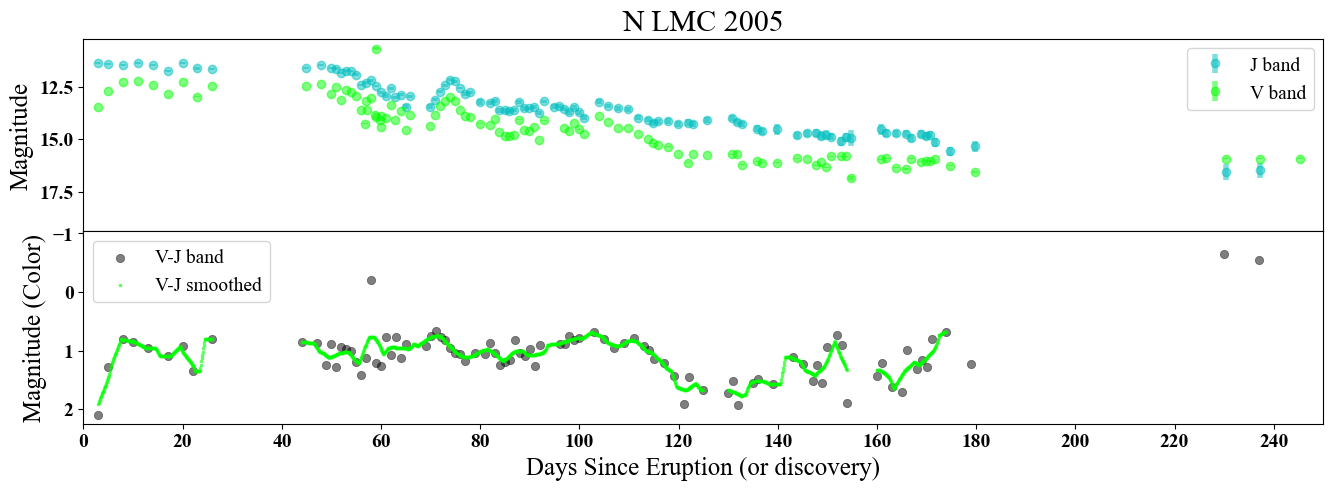

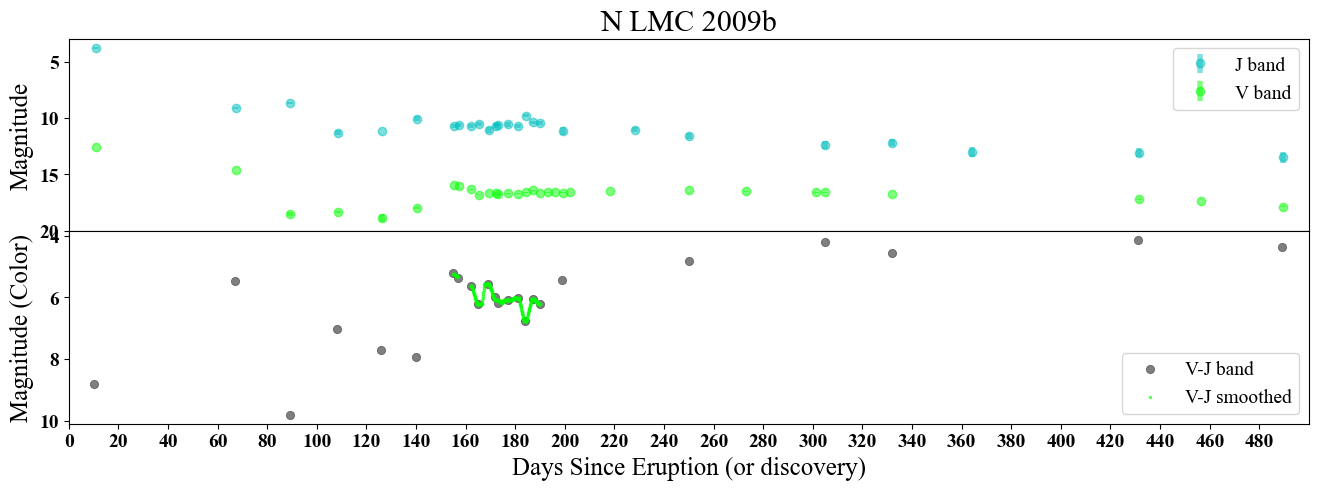

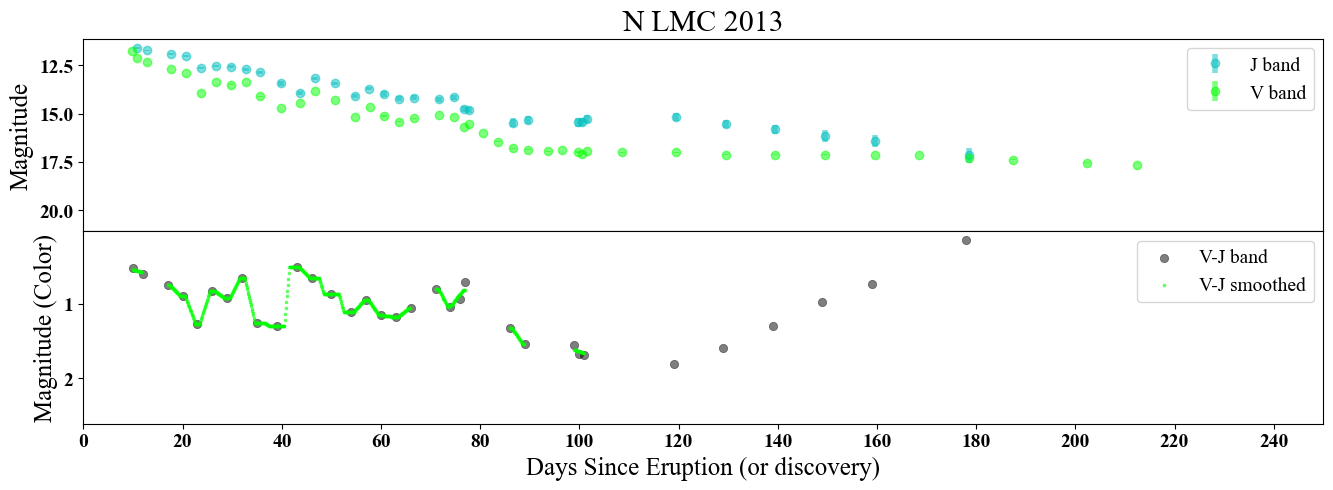

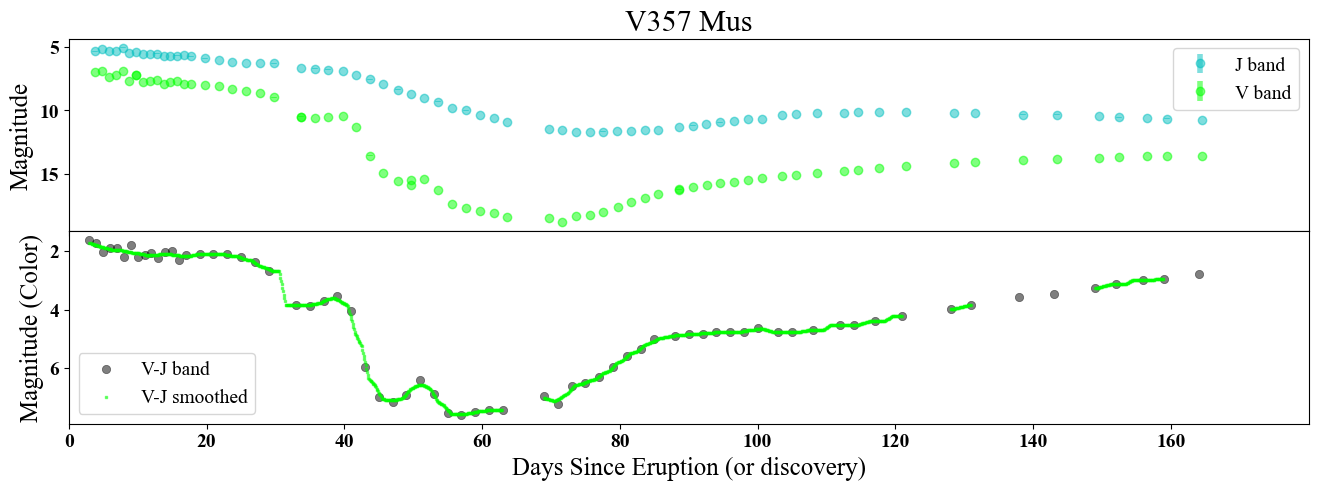

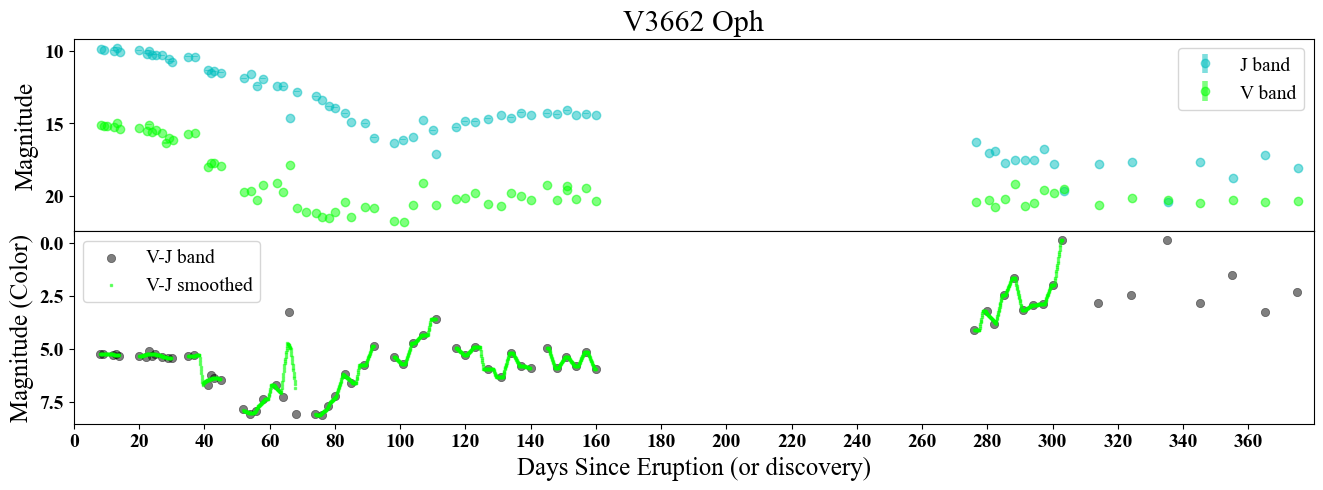

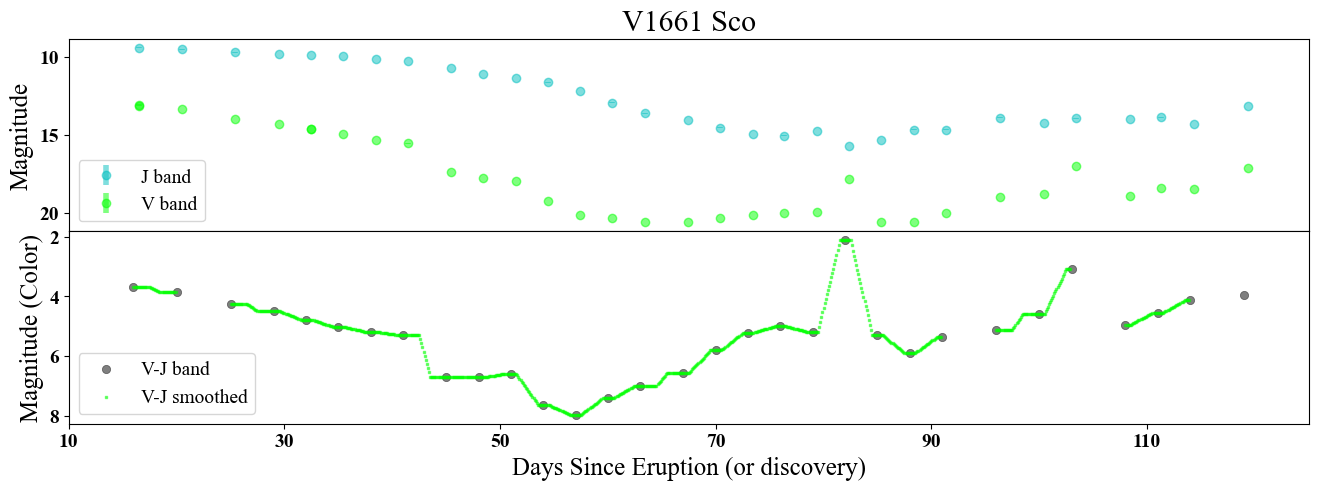

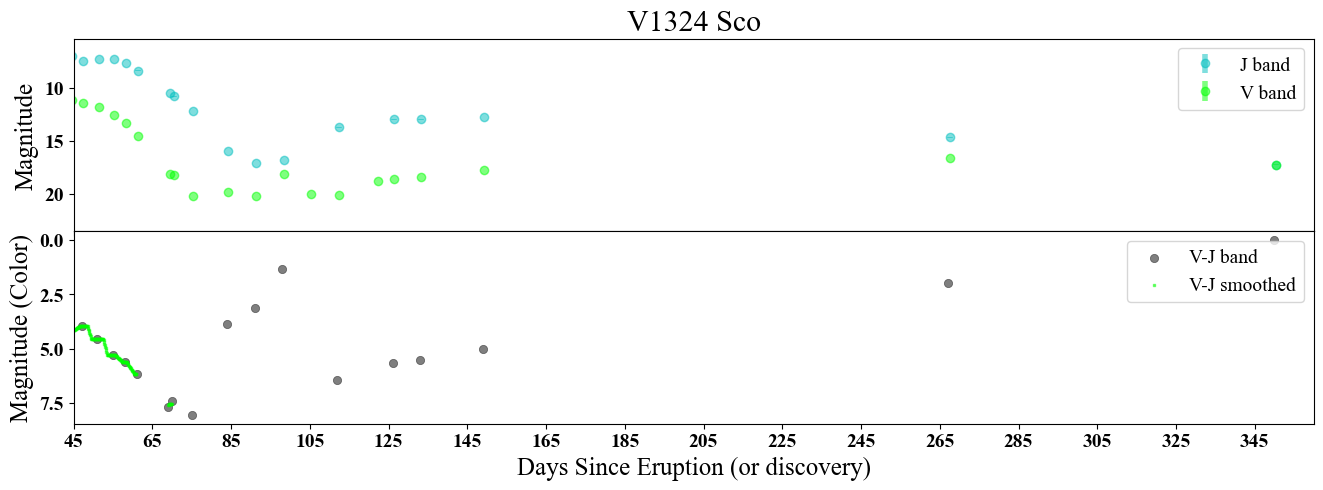

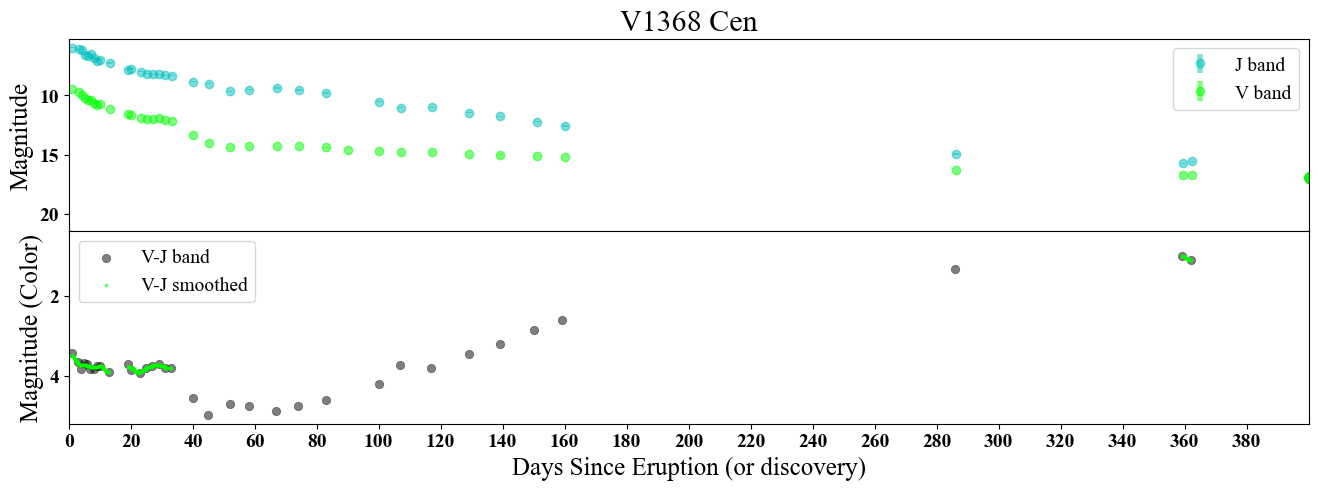

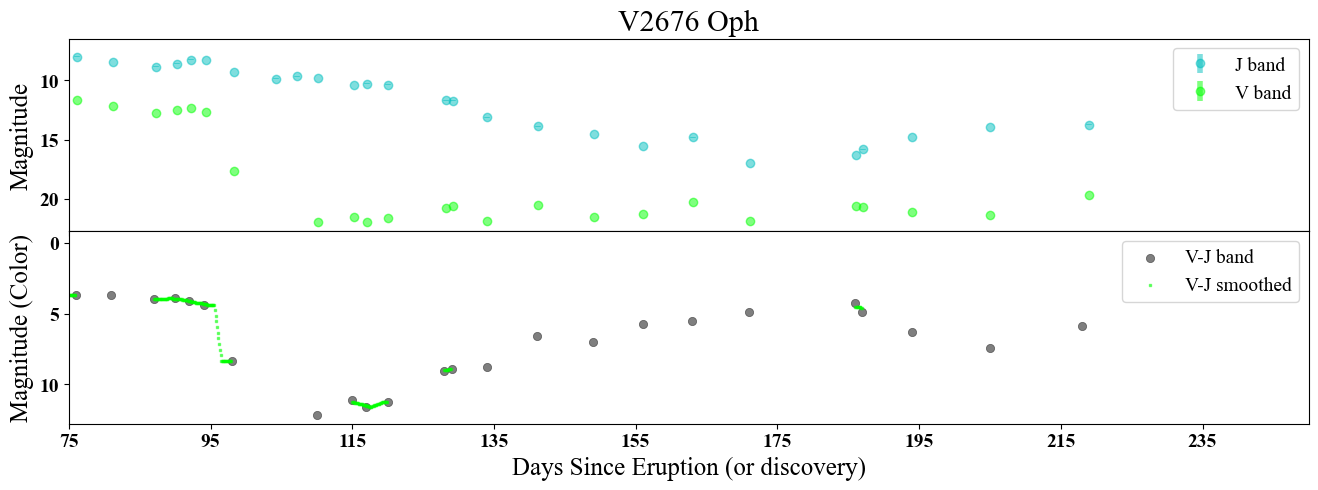

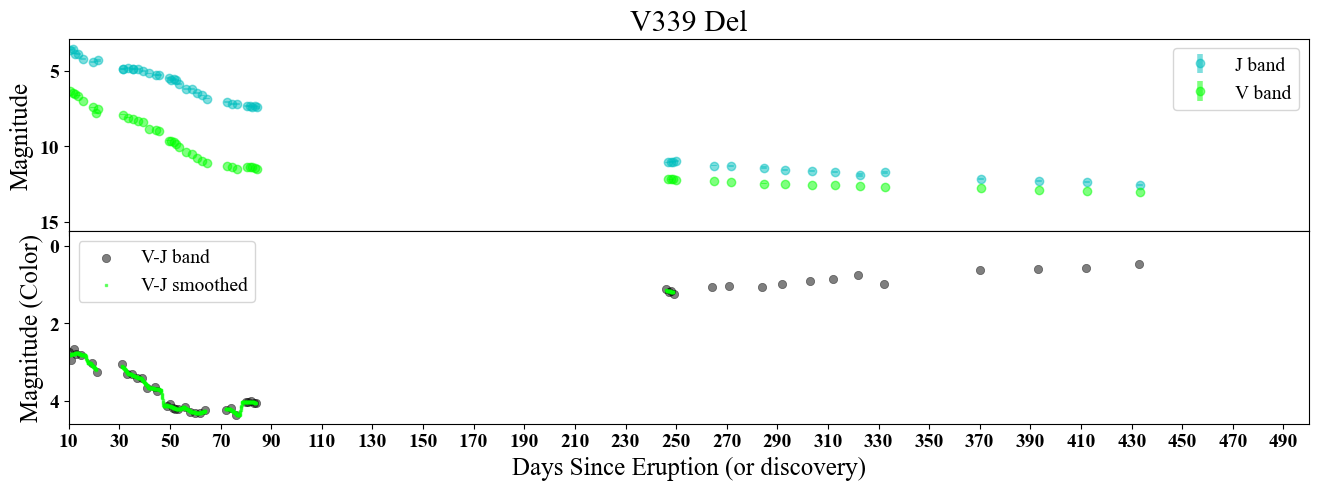

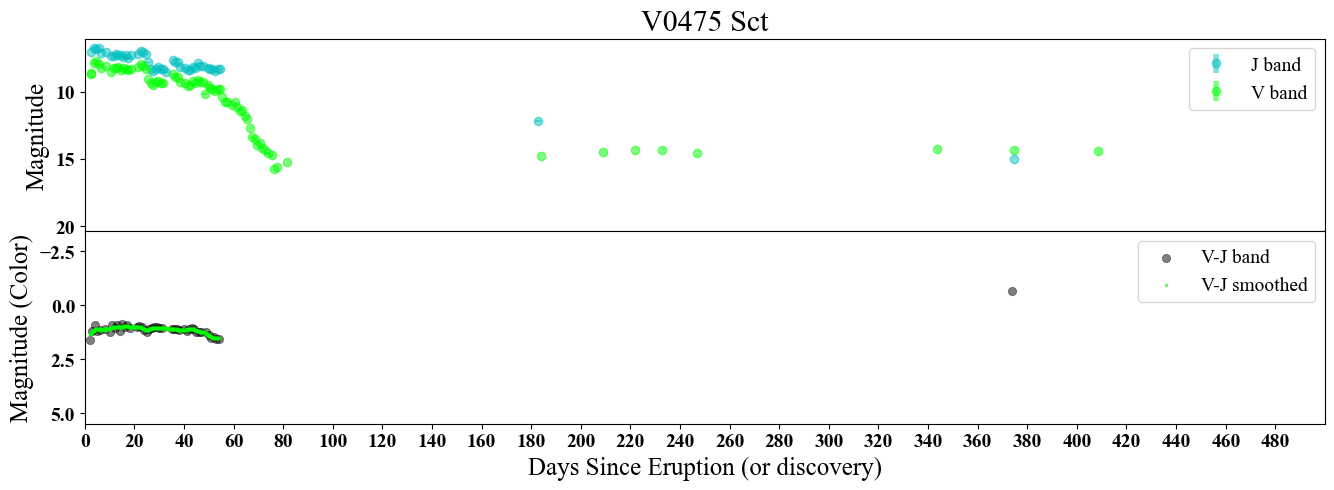

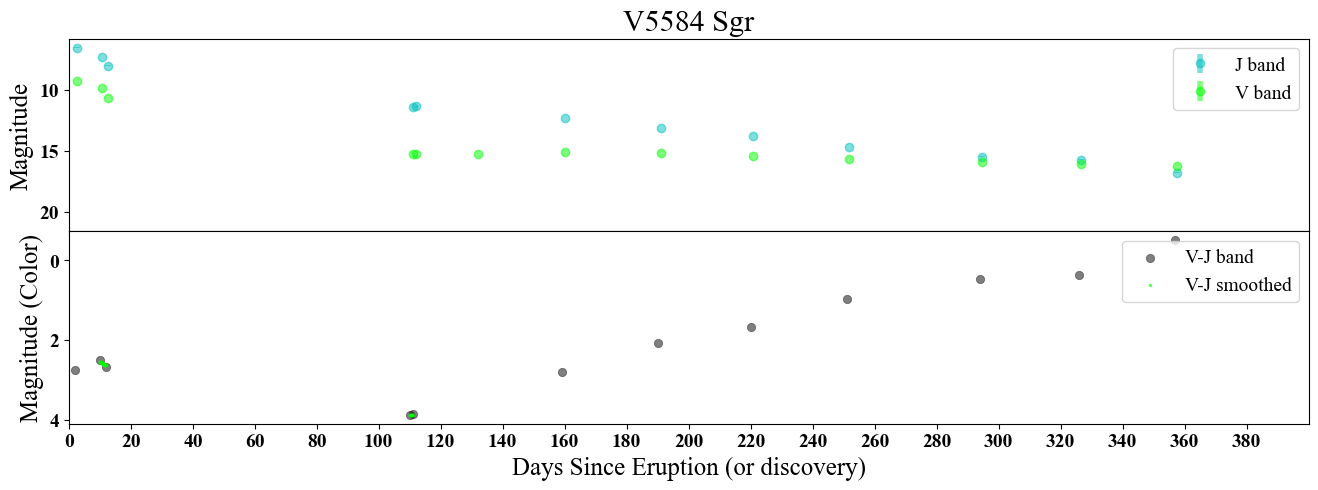

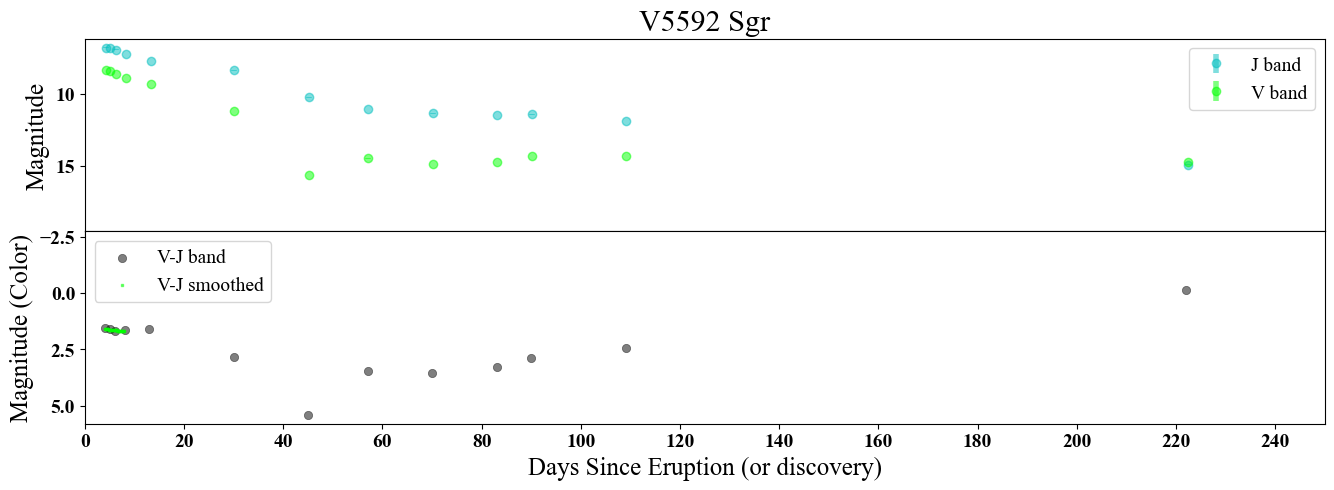

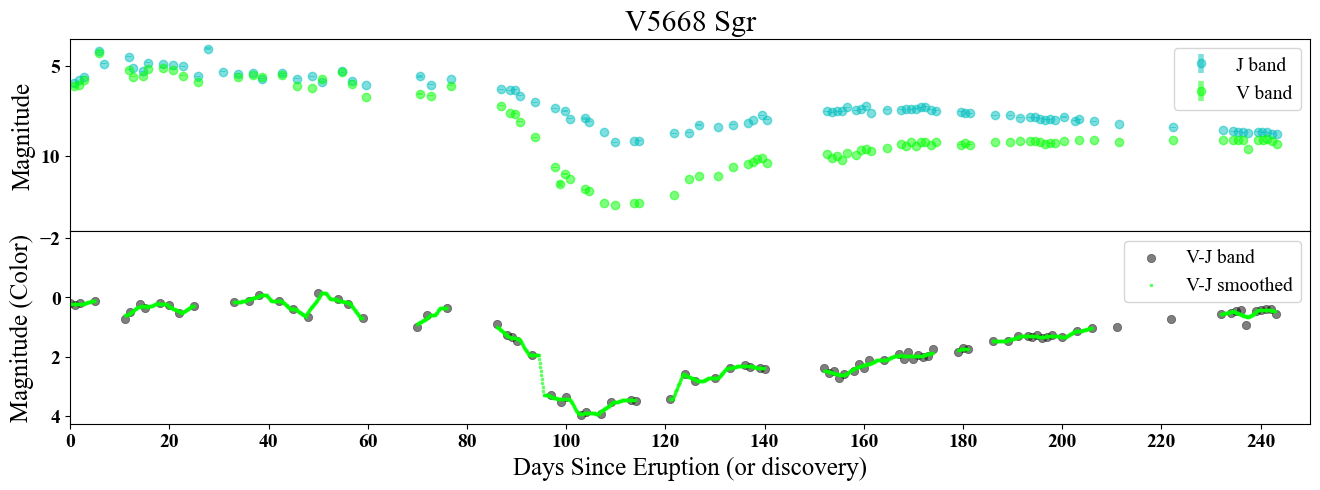

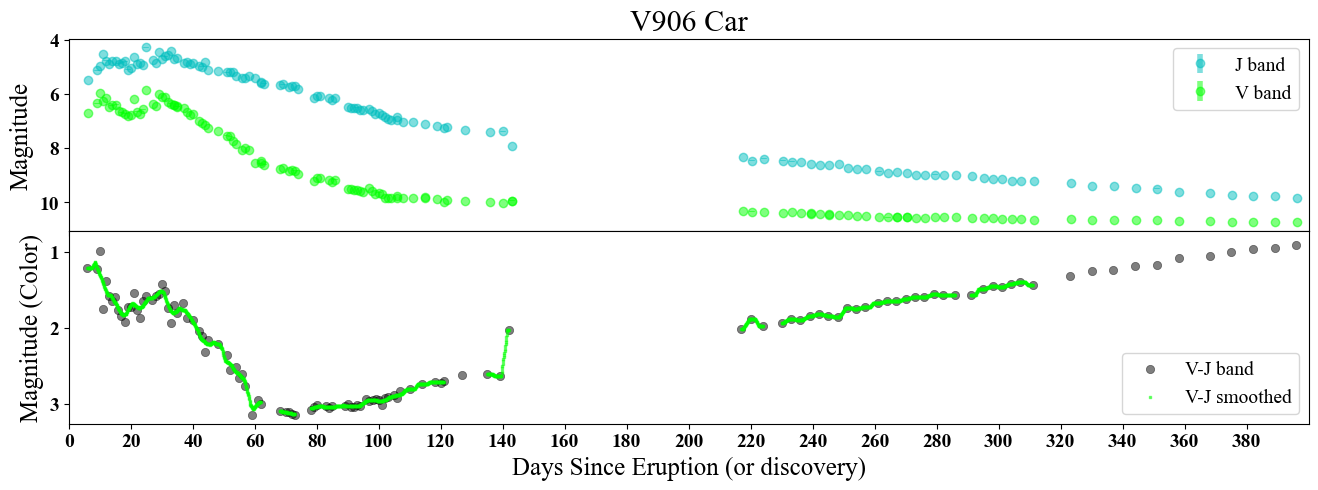

In [23]:
#main plots for dust dip
for ii in range(len(Decent_Dust_index_list)):
    Decent_Dust_index=Decent_Dust_index_list[ii]
    nova_t0_index=nova_t0_index_list[ii]
    if Decent_Dust_category[Decent_Dust_index]==2:
        Kdate=Kdate_list[ii]
        Kmag=Kmag_list[ii]
        Kerror=Kerror_list[ii]
        Hdate=Hdate_list[ii]
        Hmag=Hmag_list[ii]
        Herror=Herror_list[ii]
        Jdate=Jdate_list[ii]
        Jmag=Jmag_list[ii]
        Jerror=Jerror_list[ii]
        Idate=Idate_list[ii]
        Imag=Imag_list[ii]
        Ierror=Ierror_list[ii]
        Rdate=Rdate_list[ii]
        Rmag=Rmag_list[ii]
        Rerror=Rerror_list[ii]
        Vdate=Vdate_list[ii]
        Vmag=Vmag_list[ii]
        Verror=Verror_list[ii]
        Bdate=Bdate_list[ii]
        Bmag=Bmag_list[ii]
        Berror=Berror_list[ii]
        Vdx=V_threepiecefit_date_list[ii]
        Vy=V_threepiecefit_mag_list[ii]
        JV_daylist=JV_daylist_list[ii]
        JV_maglist=JV_maglist_list[ii]
        JV_decline_day_linfit=JV_decline_day_linfit_list[ii]
        JV_decline_mag_linfit=JV_decline_mag_linfit_list[ii]
        JV_recover_day_linfit=JV_recover_day_linfit_list[ii]
        JV_recover_mag_linfit=JV_recover_mag_linfit_list[ii]
        insufficient_points_filter=len_JV_daylist500_list[ii]
        xd=xd_list[ii]
        popt=popt_list[ii]
        JV_daylistsmooth=JV_daylistsmooth_list[ii]
        JV_maglistsmooth=JV_maglistsmooth_list[ii]
        if Decent_Dust_xlim_1[Decent_Dust_index]==-1:
            xlim_1=0
            xlim_2=500
        else:
            xlim_1=Decent_Dust_xlim_1[Decent_Dust_index]
            xlim_2=Decent_Dust_xlim_2[Decent_Dust_index]
        fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
        fig.set_size_inches(16,5)
        fig.subplots_adjust(hspace=0)
#        ax1.scatter(Kdate,Kmag,color=Kcolor,label=Kbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Hdate,Hmag,color=Hcolor,label=Hbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Jdate,Jmag,color=Jcolor,label=Jbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Idate,Imag,color=Icolor,label=Ibandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Rdate,Rmag,color=Rcolor,label=Rbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Vdate,Vmag,color=Vcolor,label=Vbandname,alpha=0.5,lw=0.5)
#        ax1.scatter(Bdate,Bmag,color=Bcolor,label=Bbandname,alpha=0.5,lw=0.5)
#        ax1.errorbar(Kdate,Kmag,yerr=Kerror,elinewidth=4,color=Kcolor,label=Kbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Hdate,Hmag,yerr=Herror,elinewidth=4,color=Hcolor,label=Hbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Jdate,Jmag,yerr=Jerror,elinewidth=4,color=Jcolor,label=Jbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Idate,Imag,yerr=Ierror,elinewidth=4,color=Icolor,label=Ibandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Rdate,Rmag,yerr=Rerror,elinewidth=4,color=Rcolor,label=Rbandname,alpha=0.5,ls='None',marker='o')
        ax1.errorbar(Vdate,Vmag,yerr=Verror,elinewidth=4,color=Vcolor,label=Vbandname,alpha=0.5,ls='None',marker='o')
#        ax1.errorbar(Bdate,Bmag,yerr=Berror,elinewidth=4,color=Bcolor,label=Bbandname,alpha=0.5,ls='None',marker='o')
#        ax1.plot(Vdx,Vy,color=Vcolor,label=Vbandname+' fit',alpha=0.5,lw=1)
        ax1.set_title(Decent_Dust_official[Decent_Dust_index])
        ax1.set_ylabel('Magnitude')
        ax1.set_xlim(xlim_1,xlim_2)
        ax1.legend(prop={'size':14,
                'weight':'normal'})
        ax1.invert_yaxis()
        #color (V-K)
        ax2.scatter(JV_daylist,JV_maglist,color=JVcolor,label=JVlabel,alpha=0.5,lw=0.5)
#        if insufficient_points_filter>=4:
#            ax2.plot(JV_decline_day_linfit,JV_decline_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(JV_recover_day_linfit,JV_recover_mag_linfit,color=JV_linfit_color,label=JV_linfit_label,alpha=0.5,lw=2)
#            ax2.plot(xd,piecewise_linear(xd,*popt),color='purple',label='Continuous Linear Fit',alpha=0.5,lw=2)
        ax2.scatter(JV_daylistsmooth,JV_maglistsmooth,color=JVsmoothcolor,label=JVsmoothlabel,alpha=0.5,marker=',',s=4,lw=1)
        ax2.set_ylabel('Magnitude (Color)')
        ax2.set_xlabel('Days Since Eruption (or discovery)')
        ax2.set_xlim(xlim_1,xlim_2)
        ax2.legend(prop={'size':14,
                'weight':'normal'})
        ax2.invert_yaxis()
        savefigpath=r"C:\Users\Atticus Chong\OneDrive\Documents\Summer_Internship_2021\Image_files\ "
        savefigpath=savefigpath.rstrip()
        savefigpath=savefigpath+Decent_Dust_official[Decent_Dust_index]
        savefigpath=savefigpath+'_J.pdf'
        plt.xticks(np.arange(xlim_1,xlim_2,20))
        plt.savefig(savefigpath,transparent=True,bbox_inches='tight')

93
41


array([[<AxesSubplot:xlabel='broken_m1', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='broken_m2', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='cont_m1', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='cont_m2', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='big_drop', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='big_rise', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='mag_range', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='biggest_change', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='color_change_from_vmax', ylabel='broken_m1'>,
        <AxesSubplot:xlabel='day_change_from_vmax', ylabel='broken_m1'>],
       [<AxesSubplot:xlabel='broken_m1', ylabel='broken_m2'>,
        <AxesSubplot:xlabel='broken_m2', ylabel='broken_m2'>,
        <AxesSubplot:xlabel='cont_m1', ylabel='broken_m2'>,
        <AxesSubplot:xlabel='cont_m2', ylabel='broken_m2'>,
        <AxesSubplot:xlabel='big_drop', ylabel='broken_m2'>,
        <AxesSubplot:xlabel='big_rise', ylabel='bro

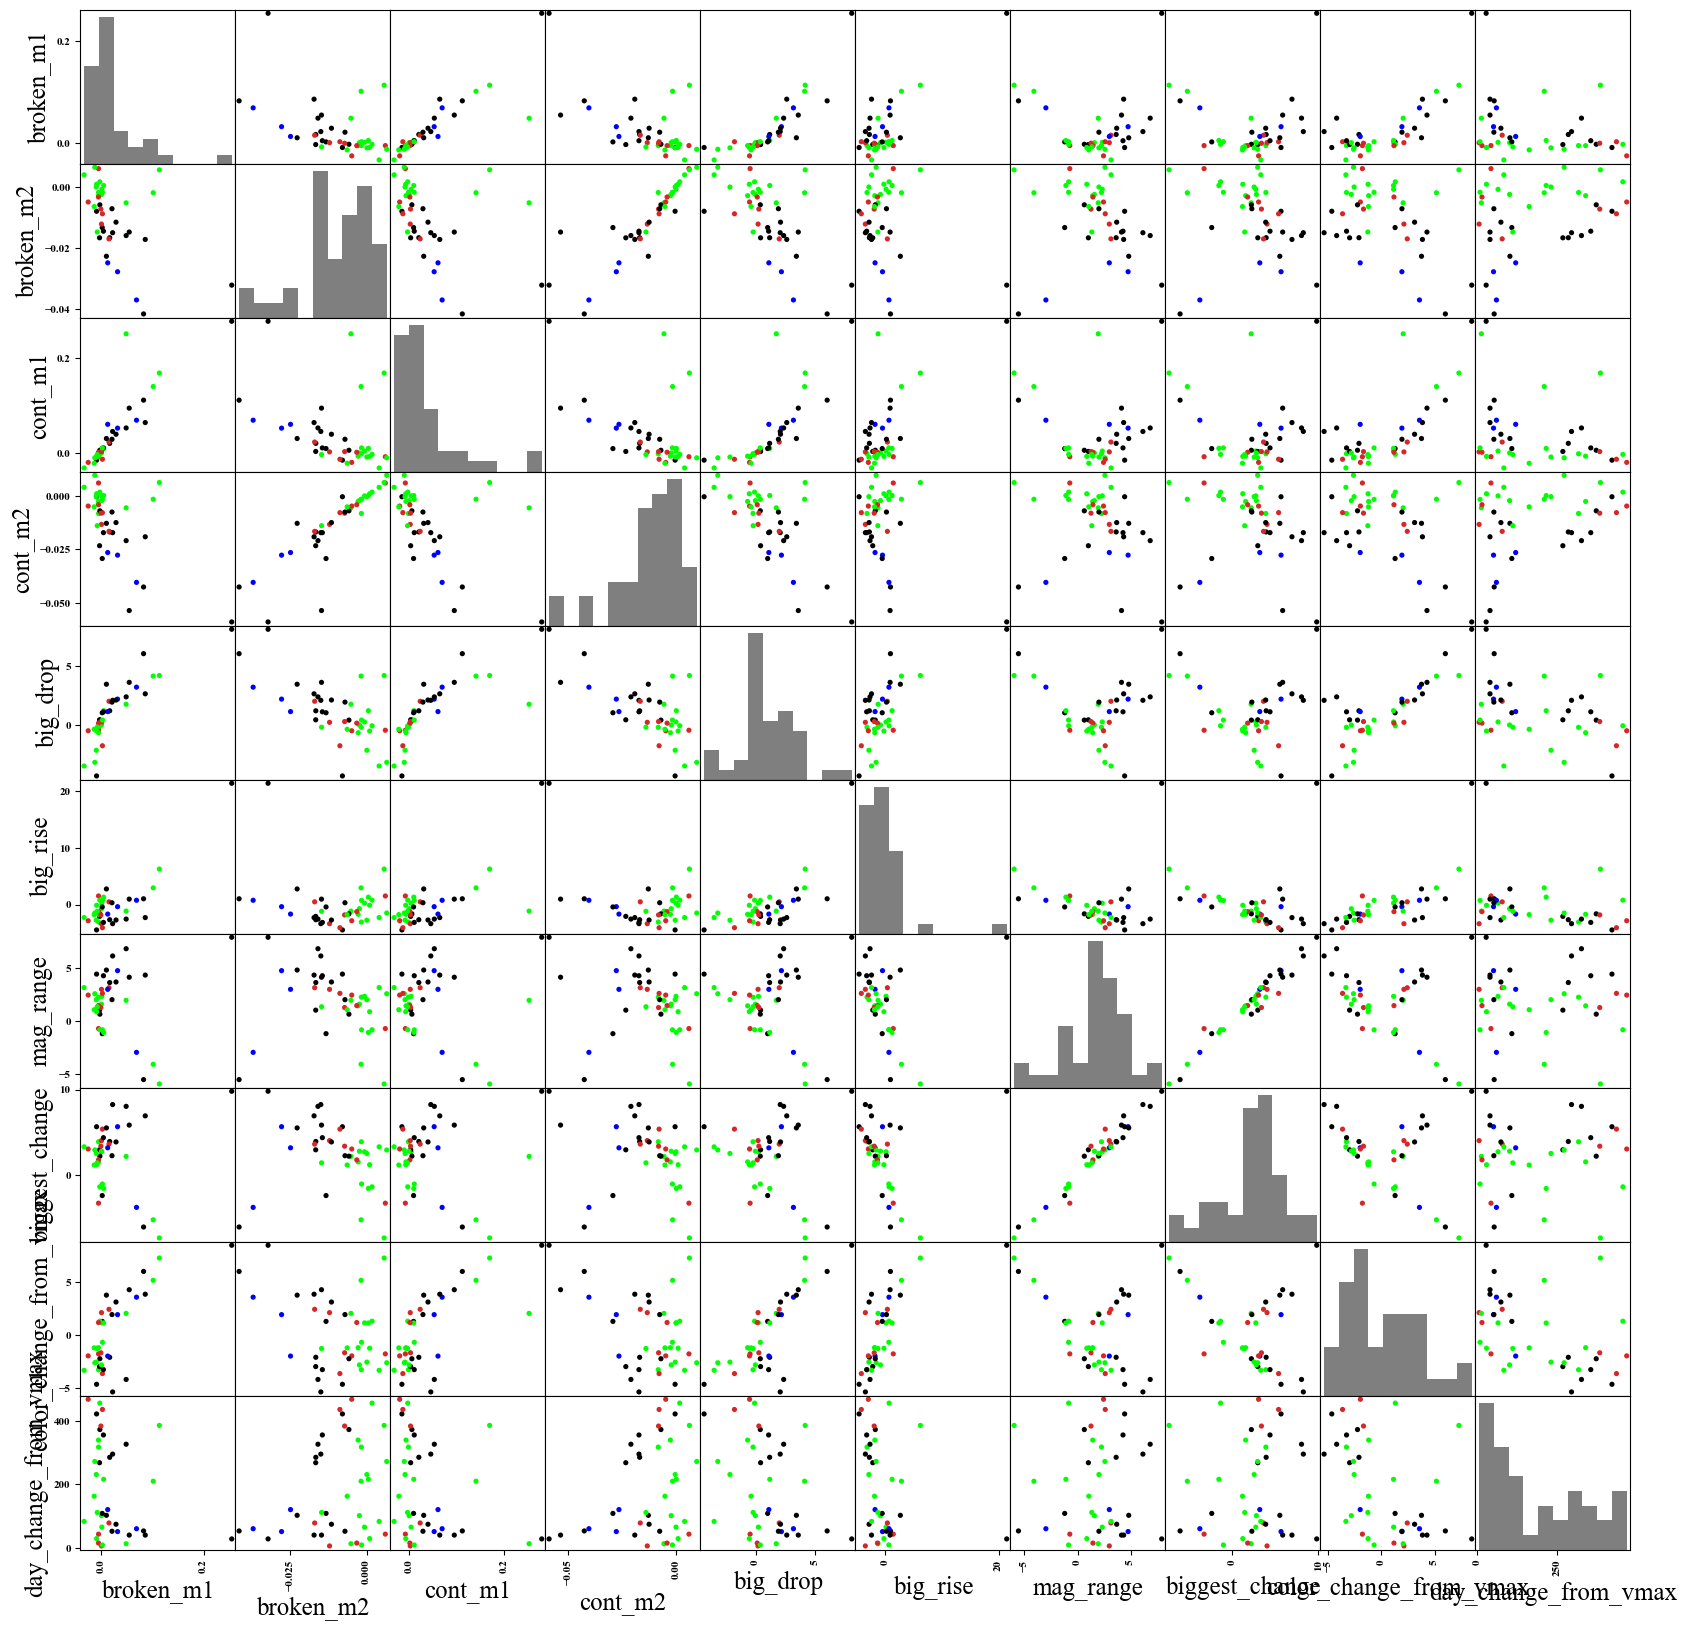

In [24]:
#print(features.isnull().loc[:,:])
print(len(features))
features_drop=features.dropna(thresh=2)
features_dropped=features_drop.drop(features_drop.index[np.where(np.asarray(features_drop.loc[:,'category'])<-1)[0]])
print(len(features_dropped))
features_colorlist=[]
features_labellist=[]
for line in features_dropped.index:
    if features_dropped.loc[line,'category']==-3:
        features_colorlist.append('tab:olive')
        features_labellist.append('n/a')
    elif features_dropped.loc[line,'category']==-2:
        features_colorlist.append('gold')
        features_labellist.append('bad data')
    elif features_dropped.loc[line,'category']==-1:
        features_colorlist.append('tab:red')
        features_labellist.append('unsure')
    elif features_dropped.loc[line,'category']==0:
        features_colorlist.append('lime')
        features_labellist.append('none')
    elif features_dropped.loc[line,'category']==1:
        features_colorlist.append('b')
        features_labellist.append('IR excess')
    elif features_dropped.loc[line,'category']==2:
        features_colorlist.append('black')
        features_labellist.append('dust dip')
    else:
        raise exception('Error')
#change sign of mag_range to match biggest_change
for line in features_dropped.index:
    changer=-float(features_dropped.loc[line,'mag_range'])
    if features_dropped.loc[line,'biggest_change']<0:
        features_dropped.loc[line,'mag_range']=changer
pd.plotting.scatter_matrix(features_dropped.loc[:,'broken_m1':'day_change_from_vmax'],figsize=(20,20),color=features_colorlist,marker='o',s=14,alpha=1,hist_kwds={'color':['k'],'alpha':0.5})

Text(0.5, 1.0, '(V-J) Color Change From V-Band Max Time vs t2')

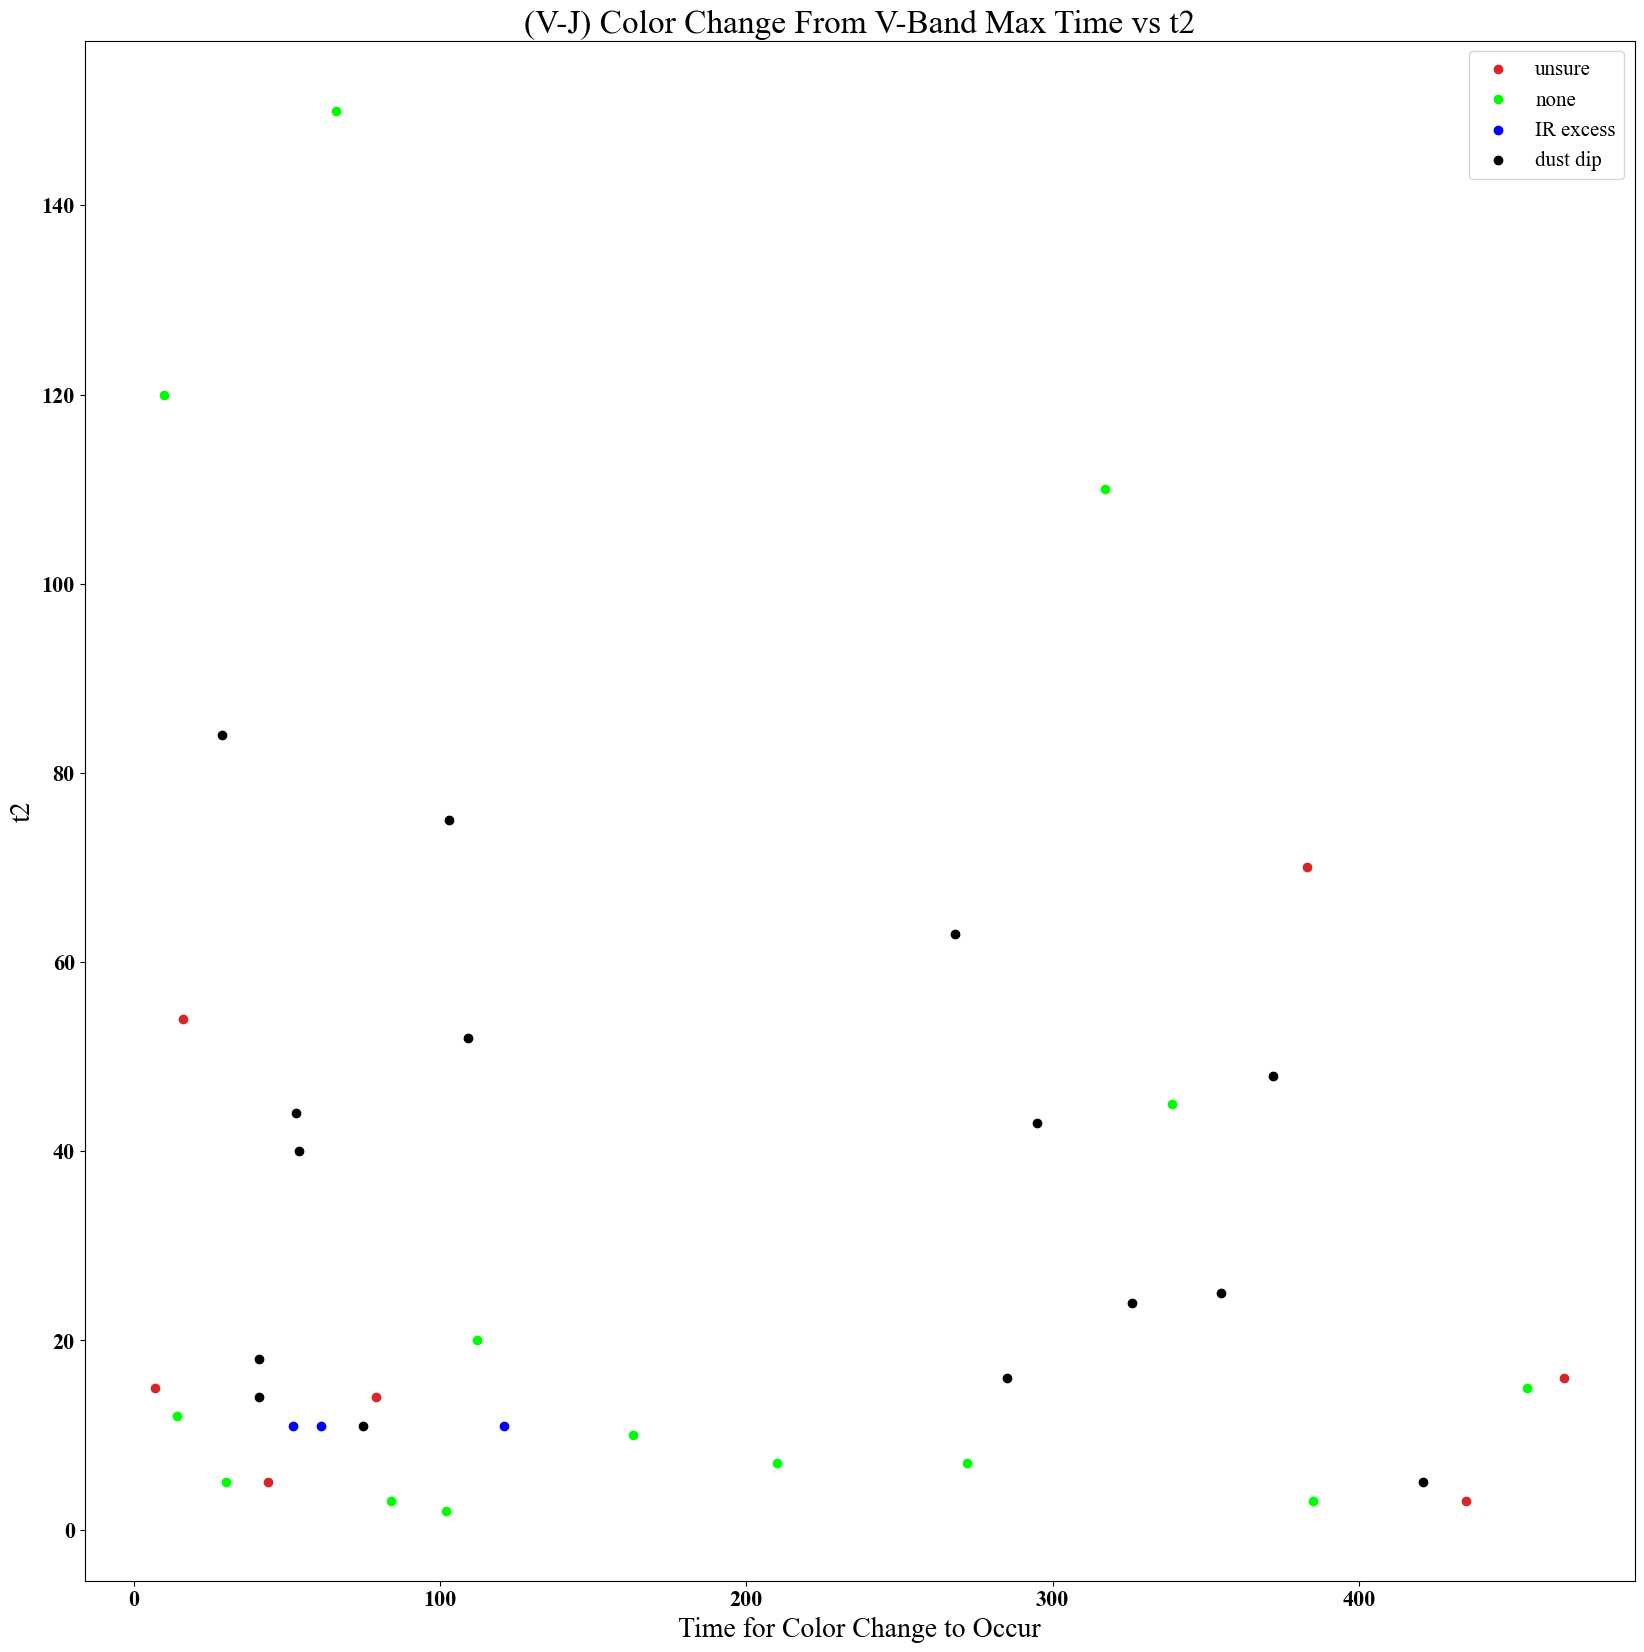

In [25]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(20,20))
plt.subplot(111)
colorlist_short=['tab:olive','gold','tab:red','lime','b','black']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        features_dropped_day_change_from_vmax_temp=[]
        features_dropped_t2=[]
        features_dropped_name_temp=[]
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_day_change_from_vmax_temp.append(features_dropped["day_change_from_vmax"][ii])
            features_dropped_t2.append(features_dropped["t2"][ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
        plt.scatter(features_dropped_day_change_from_vmax_temp,features_dropped_t2,color=colorlist_short[color],label=label,alpha=1)
#        for i,txt in enumerate(features_dropped_name_temp):
#            plt.annotate(Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]],(features_dropped_day_change_from_vmax_temp[i],features_dropped_t2[i]),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.legend(prop={'size':15,
                'weight':'normal'})
plt.xlabel('Time for Color Change to Occur')
plt.ylabel('t2')
plt.title('(V-J) Color Change From V-Band Max Time vs t2')
#plt.savefig('Color_Change_Time_vs_t2.pdf')

Text(0.5, 1.0, 't2 vs Start to Trough of V-K')

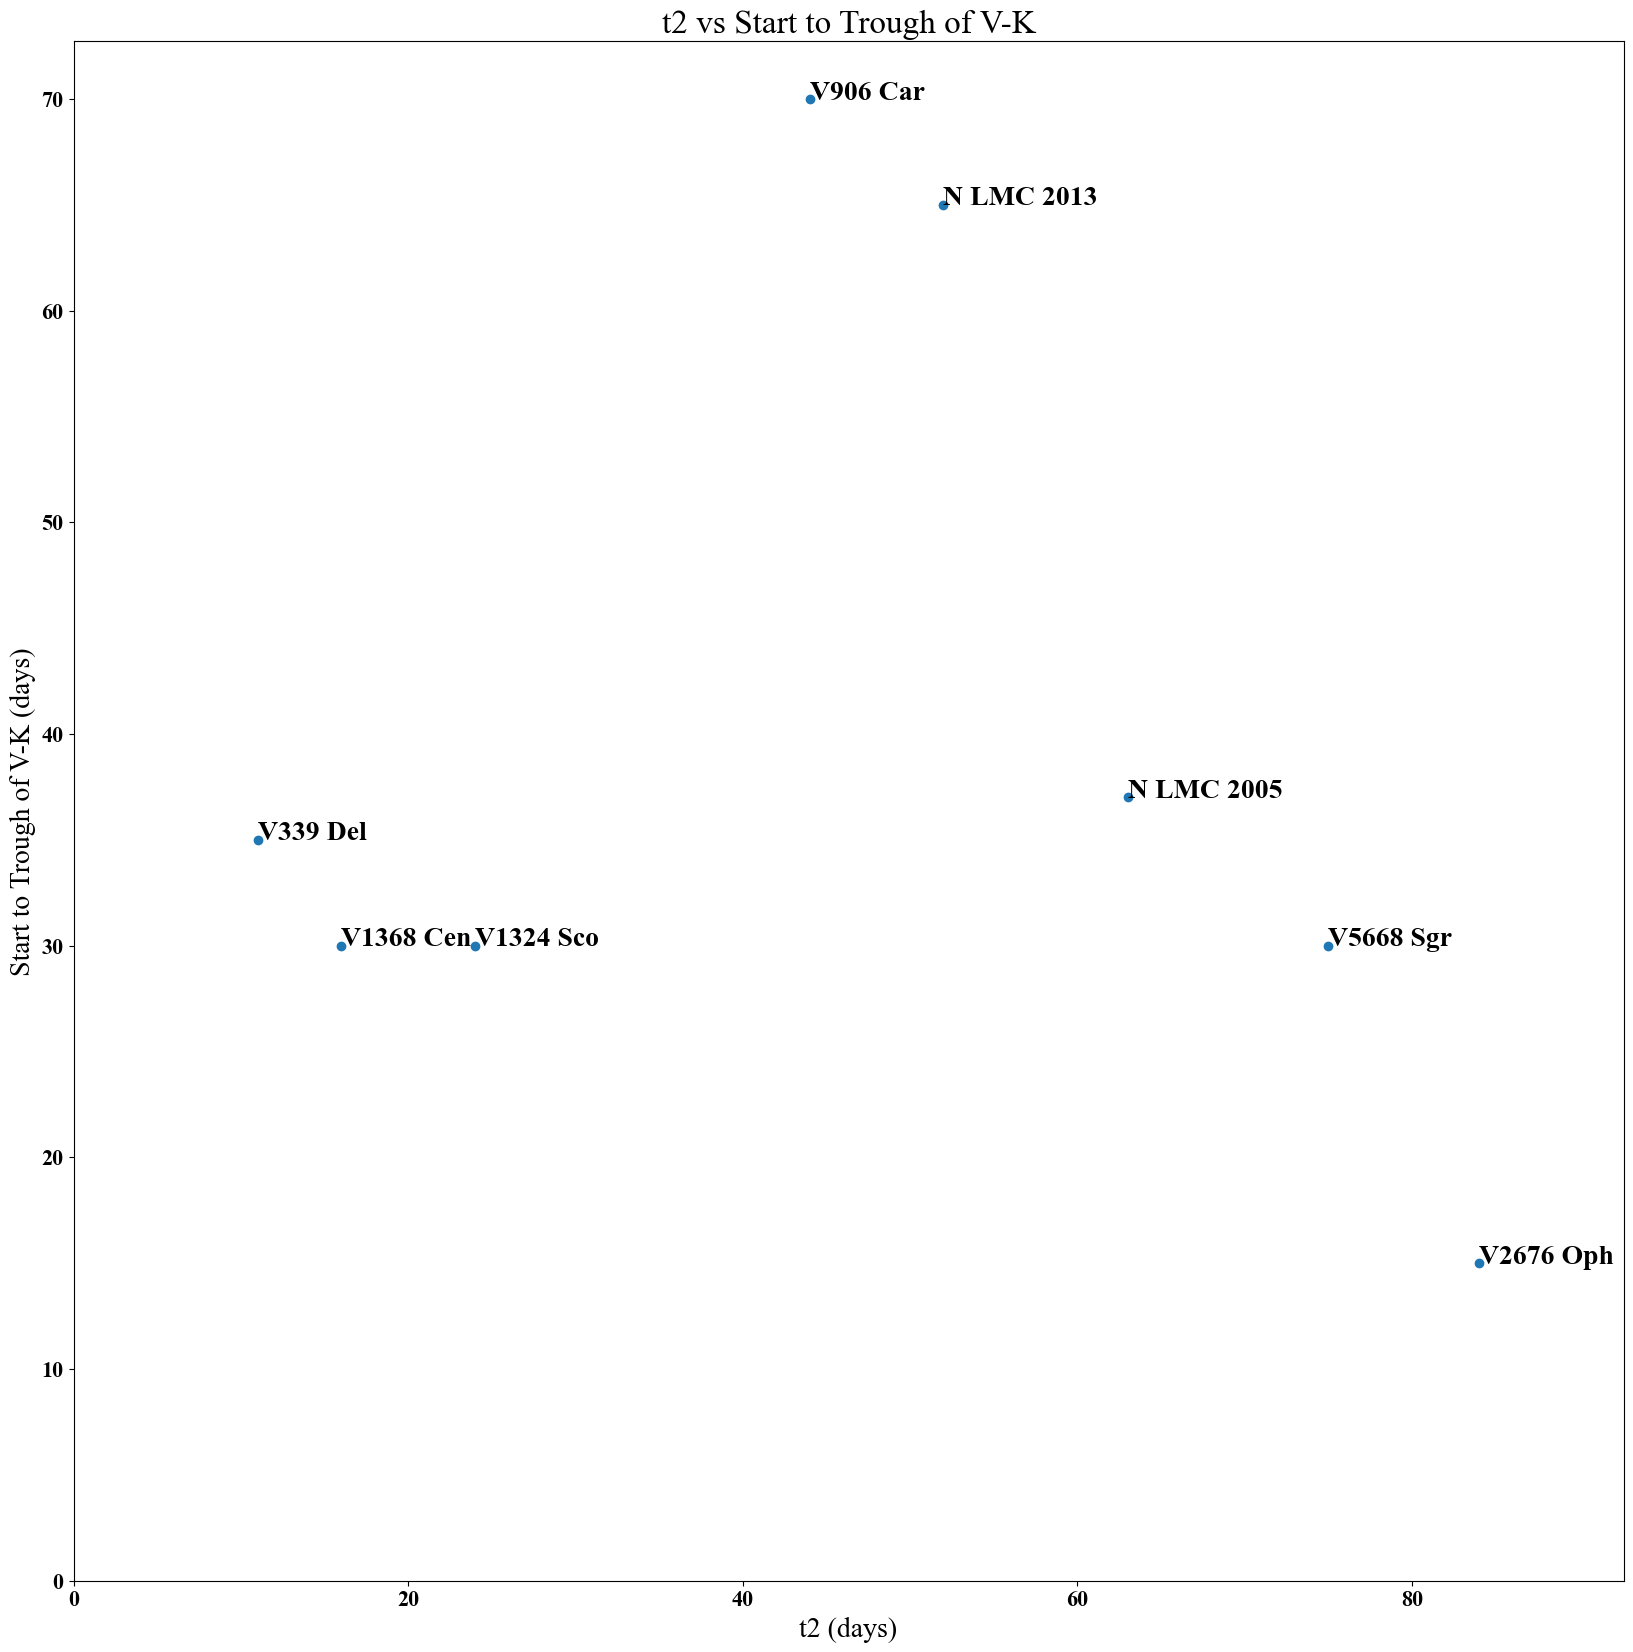

In [26]:
t2_dd_names_officiallist=[]
for i in t2_dustduration_names:
    t2_dd_names_officiallist.append(name_translator(i))
t2_dd_names_official=np.array(t2_dd_names_officiallist)
t2_dustduration_t2list=[]
for i in t2_dustduration_names:
    if len(np.where(Elias_t2_arr[0]==i)[0])>0:
        t2_dustduration_t2list.append(Elias_t2_arr[1,np.where(Elias_t2_arr[0]==i)[0][0]])
    else:
        t2_dustduration_t2list.append(np.nan)
t2_dustduration_t2arr=np.array(t2_dustduration_t2list)
nanind=np.where(np.isnan(t2_dustduration_t2arr)==1)
t2_dd_t2arr_clear=np.delete(t2_dustduration_t2arr,nanind)
t2_dd_dur_clear=np.delete(t2_dustduration_dur,nanind)
t2_dd_names_official_clear=np.delete(t2_dd_names_official,nanind)
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(20,20))
plt.subplot(111)
plt.scatter(t2_dd_t2arr_clear,t2_dd_dur_clear)
for i,txt in enumerate(t2_dd_names_official_clear):
    plt.annotate(txt,(t2_dd_t2arr_clear[i],t2_dd_dur_clear[i]))
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(0,x2+5)
plt.ylim(0,y2)
plt.xlabel('t2 (days)')
plt.ylabel('Start to Trough of V-K (days)')
plt.title('t2 vs Start to Trough of V-K')
#plt.savefig('t2_vs_start_to_trough.pdf')

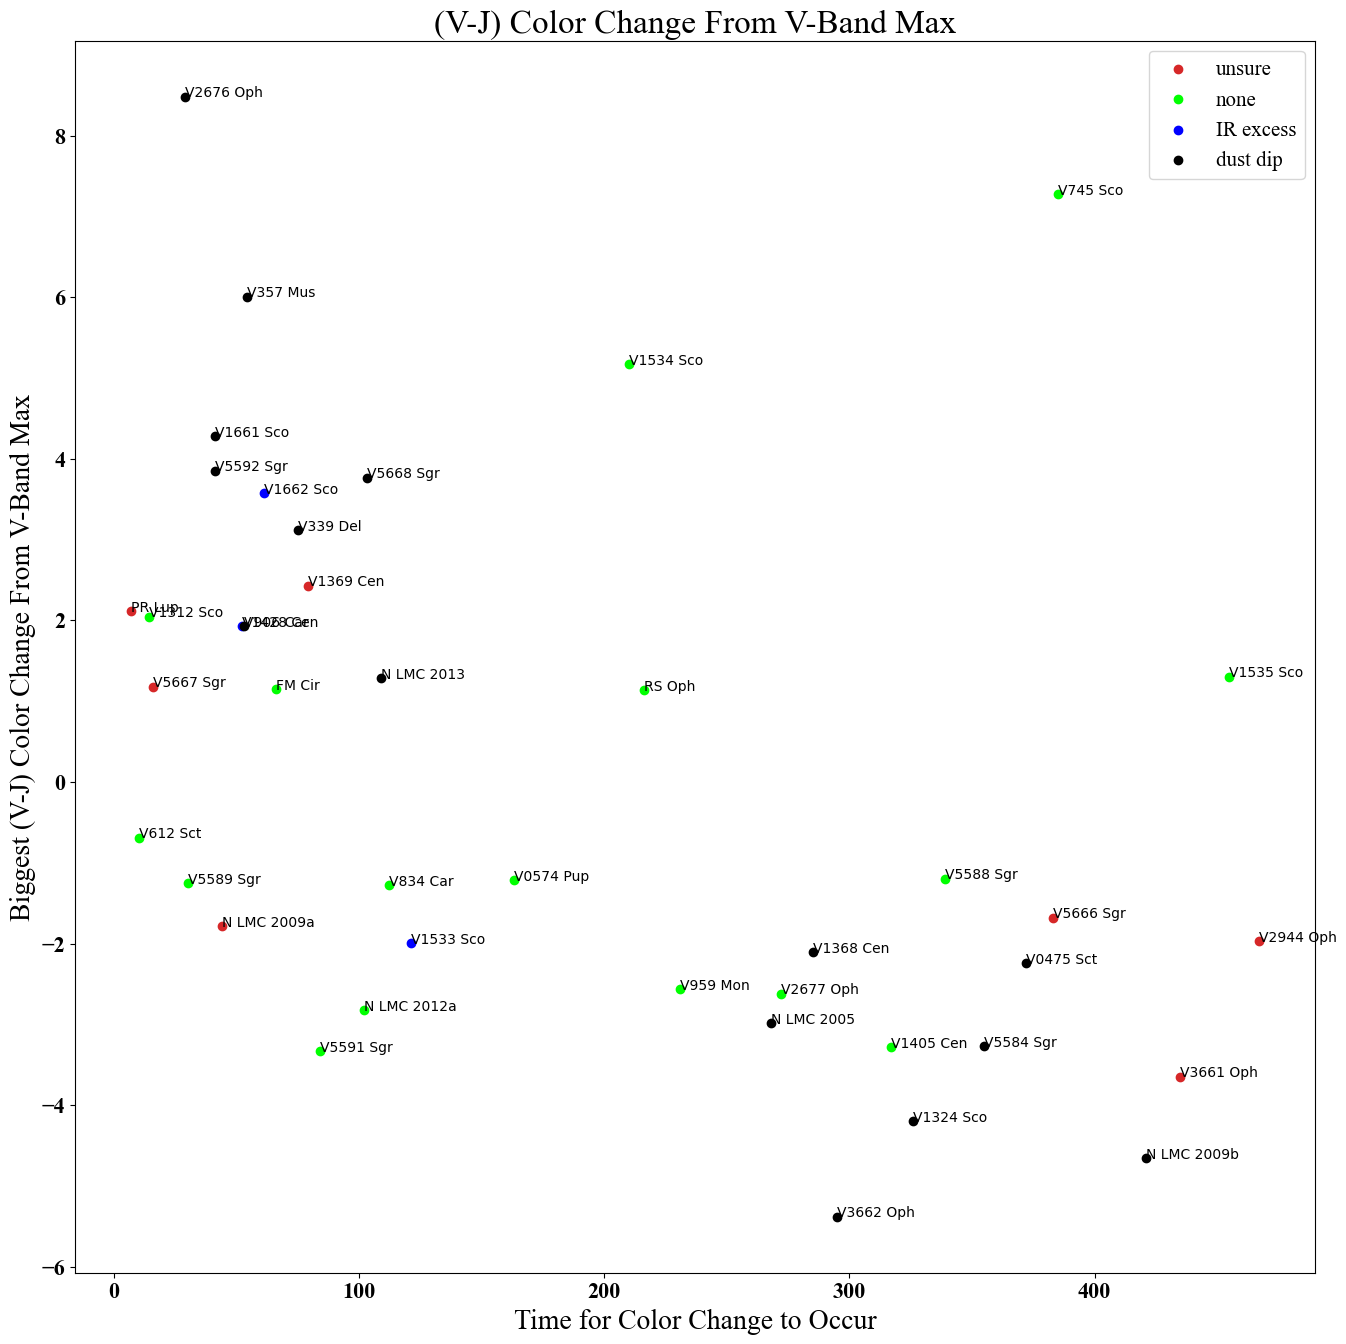

In [27]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(16,16))
plt.subplot(111)
colorlist_short=['tab:olive','gold','tab:red','lime','b','black']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        features_dropped_day_change_from_vmax_temp=[]
        features_dropped_color_change_from_vmax_temp=[]
        features_dropped_name_temp=[]
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_day_change_from_vmax_temp.append(features_dropped["day_change_from_vmax"][ii])
            features_dropped_color_change_from_vmax_temp.append(features_dropped["color_change_from_vmax"][ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
        plt.scatter(features_dropped_day_change_from_vmax_temp,features_dropped_color_change_from_vmax_temp,color=colorlist_short[color],label=label,alpha=1)
        for i,txt in enumerate(features_dropped_name_temp):
            plt.annotate(Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]],(features_dropped_day_change_from_vmax_temp[i],features_dropped_color_change_from_vmax_temp[i]),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.legend(prop={'size':15,
                'weight':'normal'})
plt.xlabel('Time for Color Change to Occur')
plt.ylabel('Biggest (V-J) Color Change From V-Band Max')
plt.title('(V-J) Color Change From V-Band Max')
#plt.plot([0,400],[1.5,4.5])
plt.savefig('Color_Change_From_VBand_Max_J.pdf',transparent=False)

Text(0.5, 1.0, 'Change in V- and J-Band Brightness from V-Band Max to largest difference in V-J Band')

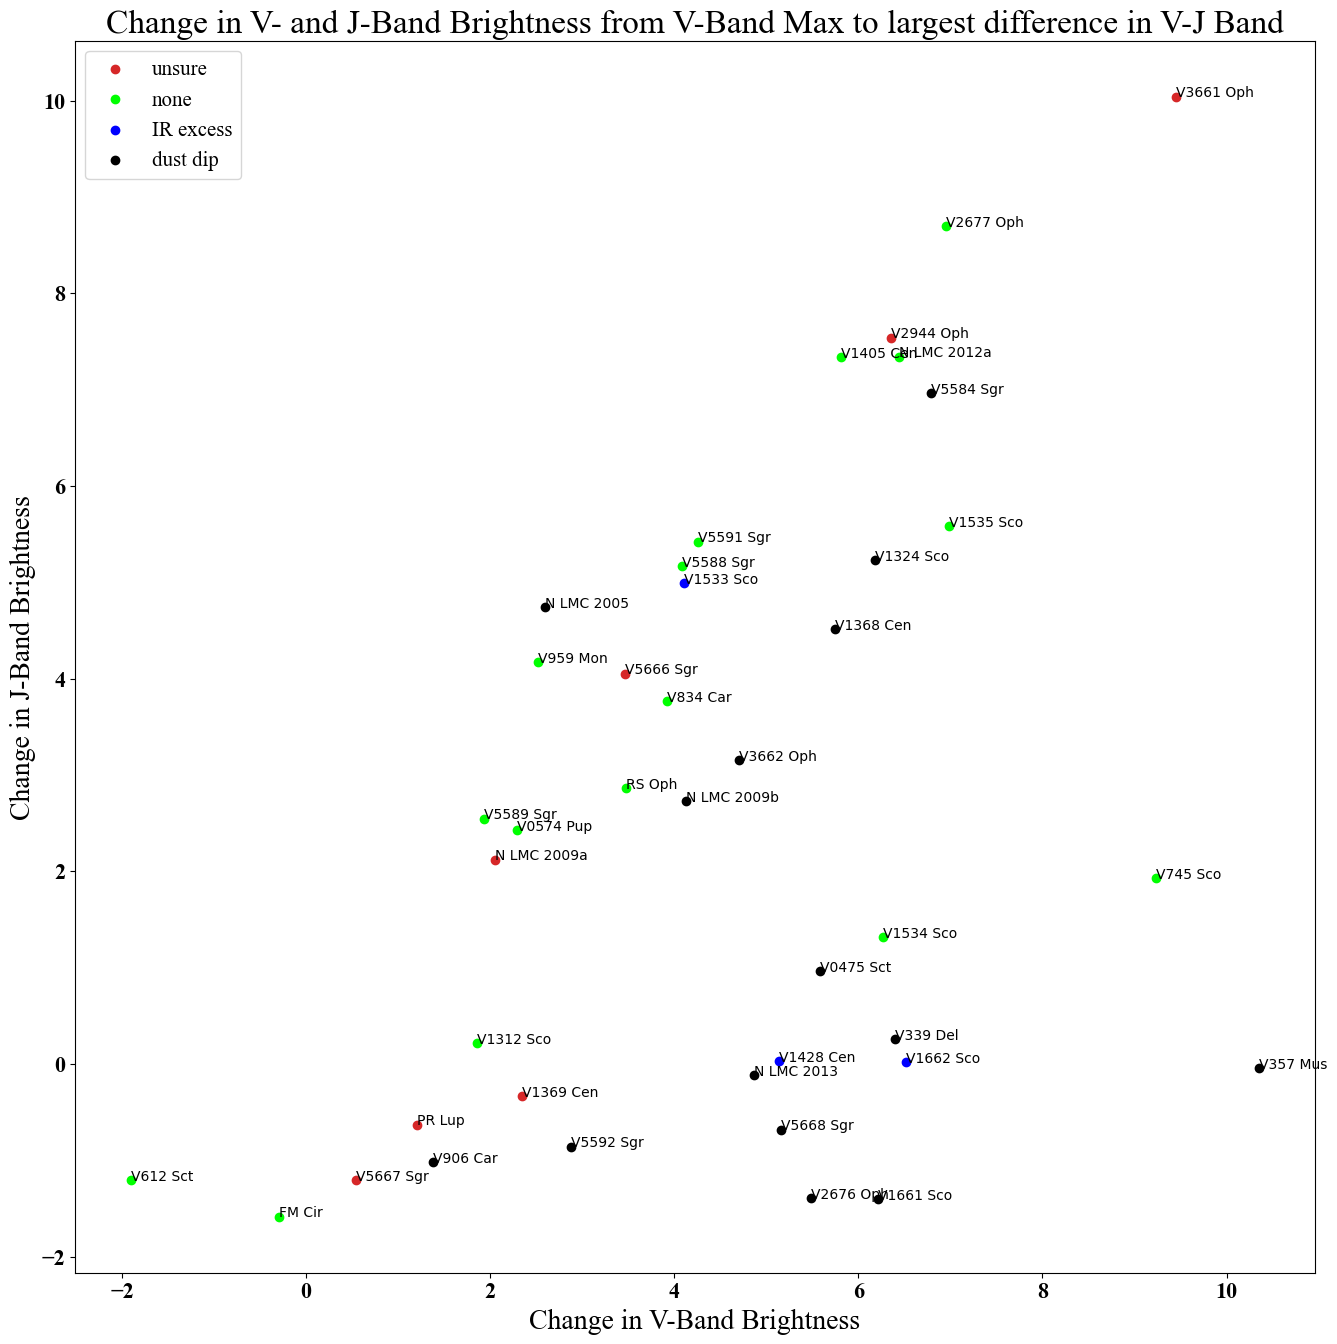

In [28]:
matplotlib.rc('xtick',labelsize=16) 
matplotlib.rc('ytick',labelsize=16) 
font={'family':'Times New Roman',
        'weight':'bold',
        'size':20}
matplotlib.rc('font',**font)
plt.figure(figsize=(16,16))
plt.subplot(111)
colorlist_short=['tab:olive','gold','tab:red','lime','b','black']
for color,label in enumerate(['n/a','bad data','unsure','none','IR excess','dust dip']):
    if color!=0 and color!=1:
        features_dropped_vband_change_over_interval=[]
        features_dropped_jband_change_over_interval=[]
        features_dropped_name_temp=[]
        for ii in np.where(np.asarray(features_labellist)==label)[0]:
            features_dropped_vband_change_over_interval.append(features_dropped["vband_change_over_interval"][ii])
            features_dropped_jband_change_over_interval.append(features_dropped["jband_change_over_interval"][ii])
            features_dropped_name_temp.append(features_dropped.index[ii])
        plt.scatter(features_dropped_vband_change_over_interval,features_dropped_jband_change_over_interval,color=colorlist_short[color],label=label,alpha=1)
        for i,txt in enumerate(features_dropped_name_temp):
            plt.annotate(Decent_Dust["Official"][np.where(Decent_Dust["Name"]==txt)[0][0]],(features_dropped_vband_change_over_interval[i],features_dropped_jband_change_over_interval[i]),font={'family':'DejaVu Sans','weight':'normal','size':10})
x1,x2=plt.xlim()
y1,y2=plt.ylim()
plt.xlim(x1,x2)
plt.ylim(y1,y2)
plt.legend(prop={'size':15,
                'weight':'normal'})
plt.xlabel('Change in V-Band Brightness')
plt.ylabel('Change in J-Band Brightness')
plt.title('Change in V- and J-Band Brightness from V-Band Max to largest difference in V-J Band')